<b>Описание проекта</b>:<br>
<br>
Анализ данных крупного дейтингового приложения. <br>
Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей.<br>
Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки*<br>
при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней. <br>
<br>
<b>Цель проекта:</b><br>
<br>
Был ли эксперимент успешен в целом.
Проанализировать, имеет ли нововведение смысл среди каких-либо конкретных групп пользователей.

---

# Импорт библиотек и загрузка данных

## описание данных

Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). Для каждой из них:<br>
users_*.csv – информация о пользователях:
uid – идентификатор пользователя
age – возраст
attraction_coeff – коэффициент привлекательности (от 0 до 1000, (лайки / просмотры) *1000)
coins – число монеток (внутренняя валюта)
country – страна  
visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
gender – пол
age_filter_start  – фильтр поиска, мин. значение 
age_filter_end  – фильтр поиска, макс. значение 
views_count – число полученных оценок 
was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
is_premium –  является ли премиум
total_revenue –  выручка
 
transactions_*.csv – информация о платежах пользователей:

uid – идентификатор пользователя
country – страна
joined_at – дата и время регистрации
paid_at – дата и время покупки
revenue – сумма транзакции
payment_id – идентификатор платежа
from_page – откуда пользователь перешел на страницу оплаты
product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое)

импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

# параметры графиков
sns.set(font_scale=1, rc={'figure.figsize':(12,8)})


загрузка данных

In [3]:
path = 'https://getfile.dokpub.com/yandex/get/'

df_users_test = pd.read_csv(f'{path}https://disk.yandex.ru/d/4XXIME4osGrMRA', sep=';')
df_users_con1 = pd.read_csv(f'{path}https://disk.yandex.ru/d/yJFydMNNGkEKfg', sep=';')
df_users_con2 = pd.read_csv(f'{path}https://disk.yandex.ru/d/br6KkQupzzTGoQ', sep=';')

df_trans_test = pd.read_csv(f'{path}https://disk.yandex.ru/d/gvCWpZ55ODzs2g', sep=';')
df_trans_con1 = pd.read_csv(f'{path}https://disk.yandex.ru/d/VY5W0keMX5TZBQ', sep=';')
df_trans_con2 = pd.read_csv(f'{path}https://disk.yandex.ru/d/th5GL0mGOc-qzg', sep=';')

# Exploratory data analysis

### <i>данные пользователей в df_users_***

проверим размерность

In [4]:
print(f'size of df_users_test {df_users_test.shape}')
print(f'size of df_users_con1 {df_users_con1.shape}')
print(f'size of df_users_con2 {df_users_con2.shape}')

size of df_users_test (4308, 13)
size of df_users_con1 (4340, 13)
size of df_users_con2 (4264, 13)


проверим дублирование по uid

In [5]:
print(f'unique users in test {df_users_test["uid"].nunique()}')
print(f'unique users in control1 {df_users_con1["uid"].nunique()}')
print(f'unique users in control2 {df_users_con2["uid"].nunique()}')

unique users in test 4308
unique users in control1 4340
unique users in control2 4264


типы данных

In [6]:
df_users_test.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [7]:
df_users_con1.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [8]:
df_users_con2.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

пропущенные значения

In [9]:
df_users_test.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [10]:
df_users_con1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [11]:
df_users_con2.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

колонки coins, was_premium и is_premium преобразуем в int и заменим nan на 0, visit_days проебразуем в список

In [12]:
df_users_test[['coins', 'was_premium','is_premium']] = df_users_test[['coins', 'was_premium','is_premium']].fillna(0)
df_users_test = df_users_test.astype({'coins': 'int', 'was_premium': 'int', 'is_premium': 'int'})
df_users_test['visit_days'] = df_users_test['visit_days'].apply(lambda x: list(str(x).split(',')) if x else [])

In [13]:
df_users_test.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]",1,24,30,89,0,0,0
1,892044516,27,0,0,Germany,[nan],1,24,30,0,0,0,0
2,892185708,45,44,0,Israel,"[1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",1,42,48,68,0,0,0
3,892130292,32,0,0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1,29,35,0,0,0,0
4,891406035,27,1000,0,France,[nan],1,24,30,1,1,0,0


gender категориальная переменная, цифра обозначает пол, какой именно в исходных данных не указано.

In [14]:
df_users_con1['gender'].sum()

4158

единиц больше, значит 1 - male, 0 - female (согласно многим исследованиям мужчины намного чаще пользуются дэйтинговыми сервисами)

In [15]:
df_users_test['gender'] = df_users_test['gender'].apply(lambda x: 'male' if x == 1 else 'female')

по сути, was_premium и is_premium тоже можно преобразовать в yes/no например, но для удобства расчета конверсий и проведения анализа оставим как есть

In [16]:
df_users_test.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]",male,24,30,89,0,0,0
1,892044516,27,0,0,Germany,[nan],male,24,30,0,0,0,0
2,892185708,45,44,0,Israel,"[1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",male,42,48,68,0,0,0
3,892130292,32,0,0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",male,29,35,0,0,0,0
4,891406035,27,1000,0,France,[nan],male,24,30,1,1,0,0


все то же самое проделываем для df_users_con1 и df_users_con2

In [17]:
df_users_con1[['coins', 'was_premium','is_premium']] = df_users_con1[['coins', 'was_premium','is_premium']].fillna(0)
df_users_con2[['coins', 'was_premium','is_premium']] = df_users_con2[['coins', 'was_premium','is_premium']].fillna(0)

df_users_con1 = df_users_con1.astype({'coins': 'int', 'was_premium': 'int', 'is_premium': 'int'})
df_users_con2 = df_users_con2.astype({'coins': 'int', 'was_premium': 'int', 'is_premium': 'int'})

df_users_con1['visit_days'] = df_users_con1['visit_days'].apply(lambda x: list(str(x).split(',')) if x else [])
df_users_con2['visit_days'] = df_users_con2['visit_days'].apply(lambda x: list(str(x).split(',')) if x else [])

df_users_con1['gender'] = df_users_con1['gender'].apply(lambda x: 'male' if x == 1 else 'female')
df_users_con2['gender'] = df_users_con2['gender'].apply(lambda x: 'male' if x == 1 else 'female')

In [18]:
df_users_con1.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,0,United States of America,"[1, 2, 3, 4, 5, 6]",female,22,32,982,0,0,0
1,891248523,29,500,0,United States of America,"[1, 2]",male,26,32,12,0,0,0
2,891670932,33,800,0,France,"[1, 2, 3, 5, 6, 8, 9, 11, 13, 16]",male,30,36,5,0,0,0
3,891060786,26,0,0,Argentina,"[1, 2, 3, 4, 5]",male,23,29,0,0,0,0
4,892006554,35,294,0,United States of America,"[1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17, 19]",male,30,40,17,0,0,0


In [19]:
df_users_con2.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,0,Israel,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13]",male,30,40,51,0,0,0
1,891782112,57,0,0,Italy,[1],male,54,60,0,0,0,0
2,891110337,30,769,0,France,"[1, 2, 3, 4, 5]",male,27,33,13,0,0,0
3,891796320,48,750,0,France,"[1, 4, 6, 8, 10, 11, 12, 14, 15, 16, 18]",male,45,51,12,0,0,0
4,891880212,54,638,0,United States of America,[1],male,35,53,94,0,0,0


### <i>данные о транзакциях в df_trans_***

In [20]:
print(f'size of df_trans_test {df_trans_test.shape}')
print(f'size of df_trans_con1 {df_trans_con1.shape}')
print(f'size of df_trans_con2 {df_trans_con2.shape}')

size of df_trans_test (273, 8)
size of df_trans_con1 (1007, 8)
size of df_trans_con2 (328, 8)


df_trans_con1 что-то не то с размером..

In [21]:
df_trans_con1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [22]:
df_trans_con1 = df_trans_con1.dropna()
df_trans_con1.shape

(377, 8)

типы данных

In [23]:
df_trans_test.dtypes

uid              int64
country         object
joined_at       object
paid_at         object
revenue          int64
payment_id       int64
from_page       object
product_type    object
dtype: object

In [24]:
df_trans_con1.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
dtype: object

In [25]:
df_trans_con2.dtypes

uid              int64
country         object
joined_at       object
paid_at         object
revenue          int64
payment_id       int64
from_page       object
product_type    object
dtype: object

нужно преобразовать joined_at и paid_at в datetime во всех дата фрэймах и uid, revenue, payment_id в df_trans_con1 в int

In [26]:
df_trans_test['joined_at'] = pd.to_datetime(df_trans_test['joined_at'])
df_trans_con1['joined_at'] = pd.to_datetime(df_trans_con1['joined_at'])
df_trans_con2['joined_at'] = pd.to_datetime(df_trans_con2['joined_at'])

df_trans_test['paid_at'] = pd.to_datetime(df_trans_test['paid_at'])
df_trans_con1['paid_at'] = pd.to_datetime(df_trans_con1['paid_at'])
df_trans_con2['paid_at'] = pd.to_datetime(df_trans_con2['paid_at'])

df_trans_con1 = df_trans_con1.astype({'uid': 'int', 'revenue': 'int', 'payment_id': 'int'})

### <i>dataframes preprocessing

для удобства анализа в датафрэймах df_user_*** добавим колонку group и объединим их в один, <br>
также добавим колонку с количеством дней проведенных в приложении

In [27]:
df_users_test['group'] = 'test'
df_users_con1['group'] = 'control1'
df_users_con2['group'] = 'control2'

df_users_sum = pd.concat([df_users_test, df_users_con1, df_users_con2])

df_users_sum['days_in'] = df_users_sum['visit_days'].apply(len)

разобьем пользователей на группы по возрасту

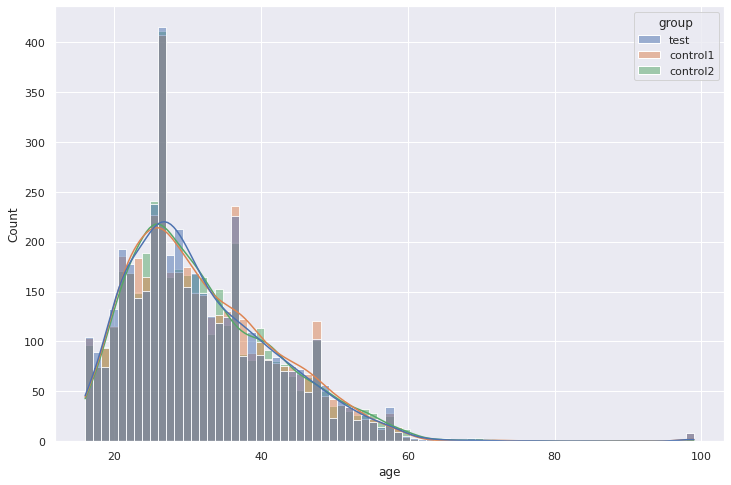

In [28]:
sns.histplot(data=df_users_sum, x='age', hue='group', kde=True);

квантили распределения

In [29]:
df_users_sum['age'].quantile([0.25, 0.5, 0.75])

0.25    25.0
0.50    30.0
0.75    38.0
Name: age, dtype: float64

In [30]:
def func_age_group(age):
    if age < 25:
        return 'age 0-24'
    if age < 30:
        return 'age 25-29'
    if age < 38:
        return 'age 30-37'
    return 'age 38-xx'

df_users_sum['age_group'] = df_users_sum['age'].apply(func_age_group)

проверка разбиения по возрасту

In [31]:
df_users_sum.groupby(['age_group', 'group']) \
    .agg({'uid': 'count'}) \
    .reset_index() \
    .pivot(index='age_group', columns='group', values='uid')

group,control1,control2,test
age_group,,,
age 0-24,1091,1057,1067
age 25-29,974,990,1053
age 30-37,1090,1077,1069
age 38-xx,1185,1140,1119


разобьем пользователей на группы по "привлекательности"

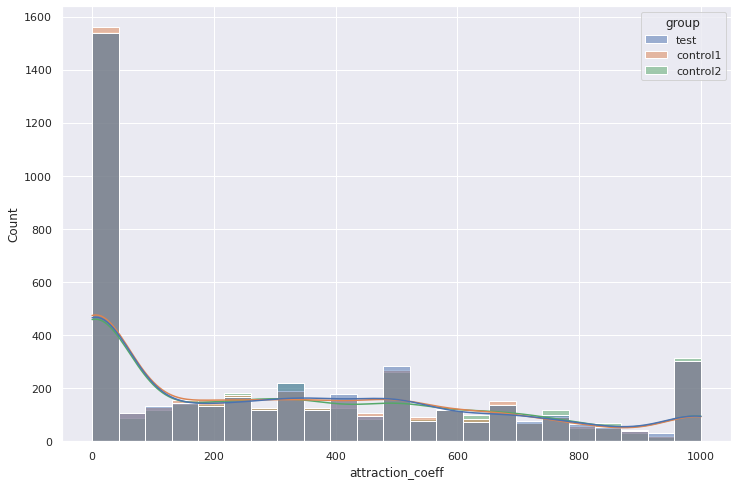

In [32]:
sns.histplot(data=df_users_sum, x='attraction_coeff', hue='group', kde=True);

квантили 

In [33]:
df_users_sum['attraction_coeff'].quantile([0.25, 0.5, 0.75])

0.25      0.0
0.50    250.0
0.75    529.0
Name: attraction_coeff, dtype: float64

много нулевых значений, квантили 0.25 и 0.5 объединим в 1

In [34]:
def func_attraction(attraction):
    if attraction < 250:
        return 'attraction 0-249'
    if attraction < 529:
        return 'attraction 250-528'
    return 'attraction 529-1000'

df_users_sum['attraction_group'] = df_users_sum['attraction_coeff'].apply(func_attraction)

проверка разбиения

In [35]:
df_users_sum.groupby(['attraction_group', 'group']) \
    .agg({'uid': 'count'}) \
    .reset_index() \
    .pivot(index='attraction_group', columns='group', values='uid')

group,control1,control2,test
attraction_group,,,
attraction 0-249,2186,2125,2119
attraction 250-528,1082,1035,1130
attraction 529-1000,1072,1104,1059


теперь посмотрим на данные о транзакциях

посмотрим как распределены суммы транзакций по времени, например понедельно

In [36]:
trans_test_week = df_trans_test.groupby('paid_at') \
    .agg({'revenue': 'sum'}) \
    .resample(rule='W') \
    .sum() \
    .rename(columns={'revenue': 'test'})
trans_con1_week = df_trans_con1.groupby('paid_at') \
    .agg({'revenue': 'sum'}) \
    .resample(rule='W') \
    .sum() \
    .rename(columns={'revenue': 'control1'})
trans_con2_week = df_trans_con2.groupby('paid_at') \
    .agg({'revenue': 'sum'}) \
    .resample(rule='W') \
    .sum() \
    .rename(columns={'revenue': 'control2'})
trans_sum_week = trans_test_week.merge(trans_con1_week, on='paid_at').merge(trans_con2_week, on='paid_at')

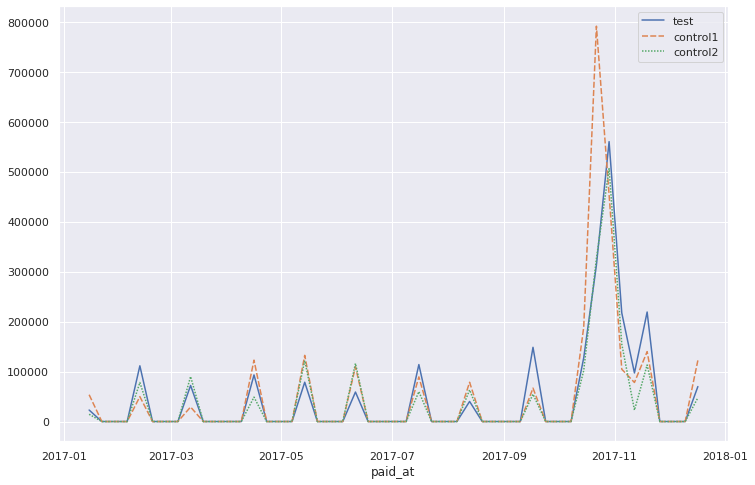

In [37]:
sns.lineplot(data=trans_sum_week);

видим предполагаемый выброс в октябре 2017 в группе control1, и выбросы поменьше в группах test и control2<br>
посмотрим конкретно на дату когда это произошло

In [38]:
df_trans_con1.groupby('paid_at').agg({'revenue': 'sum'}).sort_values('revenue', ascending=False).head(10)

,revenue
paid_at,
2017-10-16 02:26:00,63050
2017-10-16 18:42:00,63050
2017-10-18 15:02:00,63037
2017-10-16 13:10:00,63037
2017-04-11 22:17:00,63037
2017-10-16 02:08:00,50440
2017-10-15 13:11:00,47723
2017-10-17 02:23:00,35308
2017-10-17 00:40:00,31525


16 октября 2017 года было много крупных покупок

In [39]:
df_trans_con1.query('"2017-10-17" > paid_at > "2017-10-16"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
6,892333905,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,12610,19,gifts,coins
13,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783,67,menu,other_type
28,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783,67,empty_admins,other_type
43,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783,67,empty_admins,other_type
47,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783,67,menu,other_type
49,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:42:00,3783,67,menu,other_type
63,892333905,Italy,2017-10-16 01:38:00,2017-10-16 22:35:00,31525,19,menu,coins
76,892333905,Italy,2017-10-16 01:38:00,2017-10-16 18:42:00,31525,19,fans,coins
88,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783,67,empty_admins,other_type
126,892333905,Italy,2017-10-16 01:38:00,2017-10-16 22:39:00,19773,146,menu,coins


и почти все их сделал один пользователь с uid 892333905

In [40]:
df_trans_con1.groupby('uid').agg({'revenue': 'sum'}).sort_values('revenue', ascending=False).head(3)

,revenue
uid,
892333905,486330
892216461,64298
891383310,63037


посмотрим на его транзакции

In [41]:
df_trans_con1.query('uid == 892333905')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
6,892333905,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,12610,19,gifts,coins
13,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783,67,menu,other_type
28,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783,67,empty_admins,other_type
43,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783,67,empty_admins,other_type
47,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783,67,menu,other_type
49,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:42:00,3783,67,menu,other_type
63,892333905,Italy,2017-10-16 01:38:00,2017-10-16 22:35:00,31525,19,menu,coins
76,892333905,Italy,2017-10-16 01:38:00,2017-10-16 18:42:00,31525,19,fans,coins
88,892333905,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783,67,empty_admins,other_type
126,892333905,Italy,2017-10-16 01:38:00,2017-10-16 22:39:00,19773,146,menu,coins


In [42]:
df_users_sum.query('uid == 892333905')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,days_in,age_group,attraction_group
1427,892333905,22,175,3608,Italy,"[1, 2, 3, 4, 5, 6, 7, 15]",male,19,25,575,1,1,486330,control1,8,age 0-24,attraction 0-249


человек потратил 486k+ в приложении, из них 400k+ на внутренние монетки, молодой горячий итальянец<br>
возможно это бот, какой-то тестовый админский доступ или взлом, данных чтобы это понять у нас недостаточно<br>
убирать мы его пока не будем, посмотрим как это отразится на тестах

In [43]:
anomaly_user = 892333905 # запомним его

теперь посмотрим на выбросы в группах test и control2

In [44]:
df_trans_test.groupby('paid_at').agg({'revenue': 'sum'}).sort_values('revenue', ascending=False).head(10)

,revenue
paid_at,
2017-10-22 16:23:00,113477
2017-09-11 21:53:00,113477
2017-10-23 00:14:00,47918
2017-02-11 18:24:00,44083
2017-10-25 21:22:00,31525
2017-10-30 02:14:00,31525
2017-10-18 20:35:00,31525
2017-07-11 11:28:00,31525
2017-07-11 11:27:00,31525


In [45]:
df_trans_con2.groupby('paid_at').agg({'revenue': 'sum'}).sort_values('revenue', ascending=False).head(10)

,revenue
paid_at,
2017-10-27 22:30:00,81796
2017-10-16 20:41:00,63037
2017-03-11 02:57:00,19513
2017-11-13 19:45:00,16952
2017-10-31 08:39:00,16913
2017-10-25 17:17:00,16835
2017-10-11 22:48:00,16666
2017-10-31 00:54:00,16653
2017-10-30 15:35:00,16640


здесь крупные покупки в разные даты, оснований считать что это аномалии у нас нет<br>
заметим также, что к концу года покупок намного больше, это может быть связано с тем,<br>
что пользователи перед новогодними праздниками становятся более активны в поиске новых партнеров

top5 пользователей по revenue в группе test

In [46]:
df_trans_test.groupby('uid').agg({'revenue': 'sum'}).sort_values('revenue', ascending=False).head(5)

,revenue
uid,
891178380,129870
892038759,123565
892236423,95823
891346269,75647
892150854,61789


top5 пользователей по revenue в группе control2

In [47]:
df_trans_con2.groupby('uid').agg({'revenue': 'sum'}).sort_values('revenue', ascending=False).head(5)

,revenue
uid,
891778551,81796
892307238,75647
891637005,34125
892128138,30849
891664350,28119


теперь посмотрим на разницу в датах регистраций и транзакций<br>
проверим, есть ли транзакции совершенные раньше даты регистрации

In [48]:
print('транзакции совершенные раньше даты регистрации')
print(f'группа test    : у {df_trans_test.query("paid_at < joined_at")["uid"].nunique()} пользователей')
print(f'группа control1: у {df_trans_con1.query("paid_at < joined_at")["uid"].nunique()} пользователей')
print(f'группа control2: у {df_trans_con2.query("paid_at < joined_at")["uid"].nunique()} пользователей')

транзакции совершенные раньше даты регистрации
группа test    : у 35 пользователей
группа control1: у 37 пользователей
группа control2: у 41 пользователей


почти у 10% пользователей есть такие транзакции<br>
суммы этих транзакций

In [49]:
print(f'группа test    : {df_trans_test.query("paid_at < joined_at")["revenue"].sum()}')
print(f'группа control1: {df_trans_con1.query("paid_at < joined_at")["revenue"].sum()}')
print(f'группа control2: {df_trans_con2.query("paid_at < joined_at")["revenue"].sum()}')

группа test    : 401752
группа control1: 320827
группа control2: 427102


данных чтобы объяснить такое немаленькое количество расхождений в датах транзакций у нас недостаточно<br>
можно предположить что это ошибка именно в датах регистраций, даты транзакций относятся к одному периоду<br>
и картина там по группам примерно похожая

для удобства дальнейшего анализа объединим датафрэймы df_tans_*** в один

In [50]:
df_trans_sum = pd.concat([df_trans_test, df_trans_con1, df_trans_con2])

категории продуктов которые пользователи покупали в приложении

In [51]:
list(df_trans_sum['product_type'].unique())

['trial_premium', 'other_type', 'premium_no_trial', 'coins']

посчитаем количество оплат trial_premium и premium_no_trial, это пригодится в будущем при расчете конверсии

In [52]:
df_trans_sum['trial_count'] = df_trans_sum['product_type'].apply(lambda x: 1 if x == 'trial_premium' else 0)
df_trans_sum['premium_count'] = df_trans_sum['product_type'].apply(lambda x: 1 if x == 'premium_no_trial' else 0)
df_trans_subscount = df_trans_sum.groupby('uid').agg({'trial_count': 'sum', 'premium_count': 'sum'})

In [53]:
df_trans_subscount['premium_count'].value_counts()

0    258
1    251
2     13
3      4
Name: premium_count, dtype: int64

In [54]:
df_trans_subscount['trial_count'].value_counts()

0    345
1    180
2      1
Name: trial_count, dtype: int64

видим, что некоторые пользователи покупали подписку более 1 раза, <br>
<br>
теперь присоединим df_trans_subscount к df_users_sum по полю uid

In [55]:
df_users_sum = df_users_sum.merge(df_trans_subscount, how='left', on='uid').fillna(0)

и получаем один датафрэйм, где есть все необходимые нам данные

In [56]:
df_users_sum.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,days_in,age_group,attraction_group,trial_count,premium_count
0,892309896,27,685,0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]",male,24,30,89,0,0,0,test,14,age 25-29,attraction 529-1000,0.0,0.0
1,892044516,27,0,0,Germany,[nan],male,24,30,0,0,0,0,test,1,age 25-29,attraction 0-249,0.0,0.0
2,892185708,45,44,0,Israel,"[1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",male,42,48,68,0,0,0,test,20,age 38-xx,attraction 0-249,0.0,0.0
3,892130292,32,0,0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",male,29,35,0,0,0,0,test,12,age 30-37,attraction 0-249,0.0,0.0
4,891406035,27,1000,0,France,[nan],male,24,30,1,1,0,0,test,1,age 25-29,attraction 529-1000,0.0,0.0


сводная таблица по подпискам

In [57]:
df_users_sum.groupby('group') \
    .agg({'was_premium': 'sum', 'is_premium': 'sum', 'premium_count': 'sum', 'trial_count': 'sum'})

,was_premium,is_premium,premium_count,trial_count
group,,,,
control1,436,192,106.0,67.0
control2,411,191,107.0,53.0
test,408,157,76.0,62.0


проверим, все ли сходится по revenue

In [58]:
df_users_sum['total_revenue'].sum() - df_trans_sum['revenue'].sum()

-75127

не сходится, revenue по пользователям меньше на 75.000 чем по транзакциям, нужно найти этих пользователей

In [59]:
df_revenue = df_users_sum[['uid', 'total_revenue']].merge(df_trans_sum.groupby('uid').agg({'revenue': 'sum'}), on='uid', how='left').fillna(0)
df_revenue['delta'] = df_revenue['total_revenue'] - df_revenue['revenue']
df_revenue.query('delta != 0')

,uid,total_revenue,revenue,delta
2070,892275462,14885,58968.0,-44083.0
4818,960936960,26,806.0,-780.0
7678,892355163,0,30264.0,-30264.0


у 3 пользователей не бьется revenue, посмотрим на них подробнее

In [60]:
df_trans_test.query('uid == 892275462')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
64,892275462,France,2017-10-17 05:56:00,2017-02-11 18:24:00,44083,19,coins_popup,other_type
154,892275462,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885,68,super_popup,other_type


In [61]:
df_trans_sum.query('from_page == "coins_popup"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,trial_count,premium_count
64,892275462,France,2017-10-17 05:56:00,2017-02-11 18:24:00,44083,19,coins_popup,other_type,0,0
33,891367521,Italy,2017-05-11 02:37:00,2017-10-11 01:52:00,1469,19,coins_popup,other_type,0,0
200,891367521,Italy,2017-05-11 02:37:00,2017-10-11 01:52:00,1469,127,coins_popup,other_type,0,0


дата первой транзакции меньше чем дата регистрации <br>
from_page = coins_popup встречается всего 3 раза и в двух других случаях считается нормально

In [62]:
df_trans_con1.query('uid == 960936960')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
65,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26,0,refund_VP,other_type
101,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637,0,refung_AP,other_type
224,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143,0,refund_WP,other_type


In [63]:
df_trans_sum.query('from_page.str.startswith("refun")')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,trial_count,premium_count
65,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26,0,refund_VP,other_type,0,0
101,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637,0,refung_AP,other_type,0,0
224,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143,0,refund_WP,other_type,0,0


from_page = refund_VP, refung_AP, refund_WP такие значения встречаются единожды только у этого пользователя, это судя по названию возвраты денег за прошлый период

In [64]:
df_trans_con1.query('uid == 892355163')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
303,892355163,United States of America,2017-10-15 18:45:00,2017-10-16 09:52:00,30264,68,super_popup,other_type


In [65]:
df_trans_sum.query('from_page == "super_popup"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,trial_count,premium_count
14,892150854,Argentina,2017-10-20 00:25:00,2017-10-23 01:31:00,30264,68,super_popup,other_type,0,0
154,892275462,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885,68,super_popup,other_type,0,0
303,892355163,United States of America,2017-10-15 18:45:00,2017-10-16 09:52:00,30264,68,super_popup,other_type,0,0
322,891367521,Italy,2017-05-11 02:37:00,2017-06-11 17:41:00,7306,68,super_popup,other_type,0,0


ещё 3 есть похожих транзакции, они отработаны нормально <br>
в итоге при дальнейшем анализе и проведении тестов будем опираться на колонку total_revenue из data_users

# Проверка корректности сплитования


Есть два явных признака по которым делятся пользователи -  <b>country</b> и <b>gender</b> <br>
разбиение по <b>age</b> и <b>attraction</b> мы делали сами исходя из квантилей, там все корректно<br>
построим таблицу сопряженности для country

In [66]:
cross_by_country = df_users_sum.groupby(['country', 'group']) \
        .agg({'uid': 'count'}) \
        .reset_index() \
        .pivot(index='country', columns='group', values='uid') \
        .fillna(0) \
        .sort_values('test', ascending=False)

In [67]:
cross_by_country.head(20)

group,control1,control2,test
country,,,
United States of America,1471.0,1486.0,1450.0
Argentina,389.0,397.0,396.0
France,370.0,376.0,359.0
Italy,338.0,293.0,323.0
Spain,342.0,310.0,301.0
Chile,287.0,286.0,272.0
United Arab Emirates,207.0,211.0,226.0
Germany,188.0,202.0,209.0
United Kingdom (Great Britain),146.0,146.0,169.0


по таблице видно, что по признаку country пользователи практически одинаково распределены во всех группах <br>
убедимся в этом с помощью теста хи-квадрат <br>
Нулевая гипотеза этого теста: частоты в выборках согласованы

In [68]:
pval = stats.chi2_contingency(cross_by_country)[1].round(3)
if pval > 0.05:
    print(f'pvalue = {pval}, это больше 0.05 и не позволяет нам отклонить нулевую гипотезу, частоты согласованы')
else:
    print(f'pvalue = {pval}, это меньше 0.05 , с высокой долей уверенности можем отклонит нулевую гипотезу, частоты несогласованы')

pvalue = 0.658, это больше 0.05 и не позволяет нам отклонить нулевую гипотезу, частоты согласованы


также видим что есть страны представленные не во всех группах

In [69]:
cross_by_country.query('test == 0 | control1 == 0 | control2 == 0')

group,control1,control2,test
country,,,
Indonesia,0.0,0.0,4.0
Tunisia,3.0,0.0,3.0
Morocco,0.0,5.0,3.0
Tajikistan,0.0,1.0,2.0
Latvia,0.0,0.0,2.0
Pakistan,0.0,2.0,2.0
Algeria,2.0,0.0,2.0
Romania,1.0,0.0,1.0
Islamic Republic of Iran,0.0,0.0,1.0


количество пользователей в этих странах мало, оставим как есть

построим таблицу сопряженности для gender

In [70]:
cross_by_gender = df_users_sum.groupby(['gender', 'group']) \
        .agg({'uid': 'count'}) \
        .reset_index() \
        .pivot(index='gender', columns='group', values='uid') \
        .fillna(0) \
        .sort_values('test', ascending=False)

In [71]:
cross_by_gender

group,control1,control2,test
gender,,,
male,4158,4069,4106
female,182,195,202


по таблице видно, что по признаку gender пользователи практически одинаково распределены во всех группах <br>
убедимся в этом с помощью теста хи-квадрат

In [72]:
pval = stats.chi2_contingency(cross_by_gender)[1].round(3)
if pval > 0.05:
    print(f'pvalue = {pval}, это больше 0.05 и не позволяет нам отклонить нулевую гипотезу, частоты согласованы')
else:
    print(f'pvalue = {pval}, это меньше 0.05 , с высокой долей уверенности можем отклонит нулевую гипотезу, частоты несогласованы')

pvalue = 0.508, это больше 0.05 и не позволяет нам отклонить нулевую гипотезу, частоты согласованы


проверим не попали ли одни и те же пользователи в разные группы

In [73]:
test_con1 = len(set(df_users_test['uid'].unique()) & set(df_users_con1['uid'].unique()))
test_con2 = len(set(df_users_test['uid'].unique()) & set(df_users_con2['uid'].unique()))
con1_con2 = len(set(df_users_con1['uid'].unique()) & set(df_users_con2['uid'].unique()))
print(f'общих пользователей в группах test-control1     {test_con1}')
print(f'общих пользователей в группах test-control2     {test_con2}')
print(f'общих пользователей в группах control1-control2 {con1_con2}')

общих пользователей в группах test-control1     0
общих пользователей в группах test-control2     0
общих пользователей в группах control1-control2 0


сравним группы control1 и control2 между собой по total_revenue тестом t-test

проверим выполняется ли основное требование к t-test - равенство дисперсий

In [74]:
df_rev_long = df_users_sum.query('group != "test"')[['total_revenue', 'group']]
pg.homoscedasticity(df_rev_long, dv="total_revenue", group="group")

,W,pval,equal_var
levene,1.237249,0.266033,True


да, p-value > 0.05, equal_var=True, дисперсии в выборках можно считать равными

In [75]:
df_rev1 = df_users_con1['total_revenue']
df_rev2 = df_users_con2['total_revenue']
pg.ttest(df_rev1, df_rev2, correction=False) # коррекция Уэлча не требуется, дисперсии равны

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.112317,8602,two-sided,0.266033,"[-110.06, 398.82]",0.023984,0.045,0.199345


p-value сильно больше 0.05, t-test показывает что статистически значимых различий в группах нет

попробуем убрать аномального пользователя

In [133]:
df_rev_long = df_users_sum.query('group != "test" & uid != @anomaly_user')[['total_revenue', 'group']]
pg.homoscedasticity(df_rev_long, dv="total_revenue", group="group")

,W,pval,equal_var
levene,0.256951,0.612236,True


In [134]:
df_rev1 = df_users_con1.query('uid != @anomaly_user')['total_revenue']
df_rev2 = df_users_con2['total_revenue']
pg.ttest(df_rev1, df_rev2, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.506903,8601,two-sided,0.612236,"[-92.98, 157.85]",0.010931,0.028,0.079912


результаты не изменились

проведем А/А тест, будем сравнивать подвыборки из групп control1 и control2 с помощью t-test <br>
запустим симуляцию 1000 раз и посчитаем количество ложно-положительных результатов t-tests (False Positive Rate) <br>
сделаем это для двух размеров подвыборки: ~10% и ~50%

функция для А/А тестирования

In [76]:
def func_aa(data1, data2, sims=1000, size=400):
    res = []
    for i in tqdm(range(sims)):
        d1 = data1.sample(size, replace=False).values
        d2 = data2.sample(size, replace=False).values
        res.append(pg.ttest(d1, d2)['p-val'][0]) # здесь оставим коррекцию Уэлча, какие будут дисперсии 
                                                 # в случайных подвыборках мы не знаем
    sns.histplot(data=res, bins=100)
    fpr = sum(np.array(res) <0.05) / sims
    print(f'FPR= {fpr}')  


FPR= 0.041


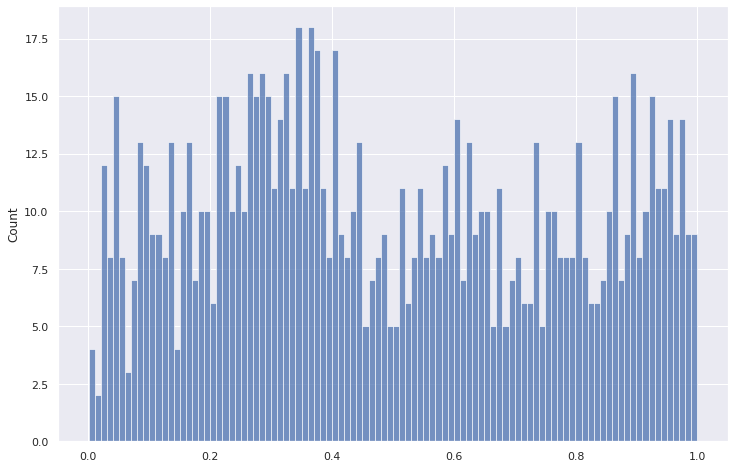

In [77]:
func_aa(df_rev1, df_rev2)


FPR= 0.005


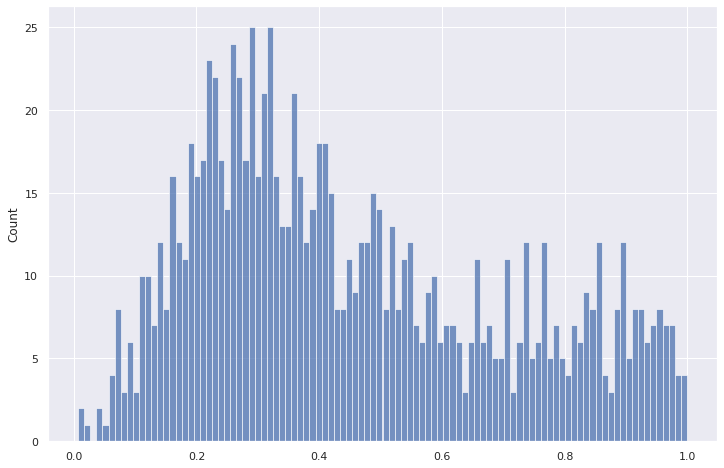

In [78]:
func_aa(df_rev1, df_rev2, size=2000)

даже при малом размере подвыборки FPR < 0.05, группы control1 и control2 статистически значимо не различаются между собой<br>
система сплитования корректна

теперь проверим сплитование по подписке

In [79]:
df_users_sum.query('group != "test"')[['group', 'premium_count']] \
    .groupby('group') \
    .agg({'premium_count': 'sum'})

,premium_count
group,
control1,106.0
control2,107.0


ну мы и раньше видели что всё корректно

# A/B тестирование

## Метрики

### <i>Первая метрика интересная для бизнеса - средняя выручка на пользователя ARPU

посмотрим на её распределение

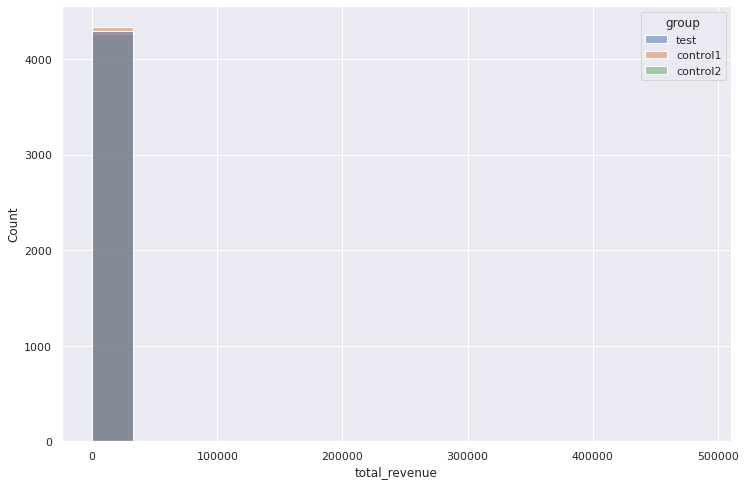

In [80]:
sns.histplot(data=df_users_sum, x='total_revenue', hue='group');

очень много нулевых значений, также есть очень большие значения, можно попробовать отсечь нулевые и применить логарифмирование

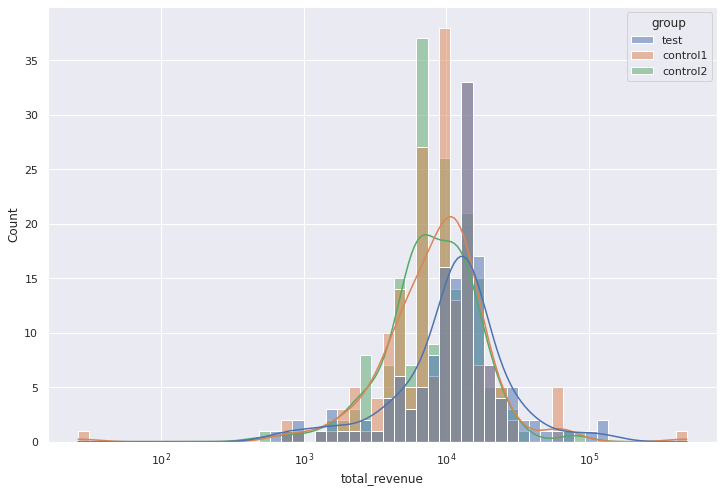

In [81]:
sns.histplot(data=df_users_sum.query('total_revenue > 0'),
            x='total_revenue', hue='group', log_scale=True, kde='kde');

распределения далеки от нормальных, близки к лог-нормальным (если не считать нули), говорить о каких-то явных отличиях не представляется возможным <br>

средние значения выручки (ARPU)

In [82]:
df_users_sum.groupby('group').agg({'total_revenue': 'mean'}).round(2).rename(columns={'total_revenue': 'ARPU'})

,RPU
group,
control1,594.76
control2,450.38
test,534.08


медианные значения выручки 

In [83]:
df_users_sum.groupby('group').agg({'total_revenue': 'median'}).rename(columns={'total_revenue': 'medRPU'})

,medRPU
group,
control1,0
control2,0
test,0


медианные значения равны нулю, очень много нулевых значений <br>
средние значения на первый взгляд различаются

### <i>Количество дней захода в приложение days_in

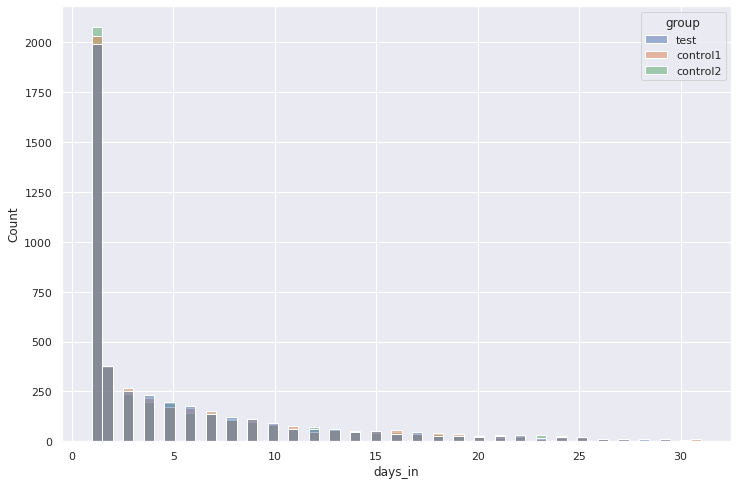

In [84]:
sns.histplot(data=df_users_sum, x='days_in', hue='group');

всё ровно и красиво

средние значения

In [85]:
df_users_sum.groupby('group').agg({'days_in': 'mean'}).rename(columns={'days_in': 'average_days_in'})

,average_days_in
group,
control1,4.947465
control2,4.765947
test,4.894150


медианные значения

In [86]:
df_users_sum.groupby('group').agg({'days_in': 'median'}).rename(columns={'days_in': 'median_days_in'})

,median_days_in
group,
control1,2
control2,2
test,2


распределения days_in практически одинаковы, медианные значения равны, средние различаются несущественно<br>
можем сделать первый предварительный вывод: <b>наш эксперимент не повлиял на посещаемость<b>

### <i>Подписка

нас интересует конверсия в оплату подписки

In [87]:
df_subs = df_users_sum[['uid', 'group', 'trial_count', 'premium_count']]
subs_cr = df_subs.groupby('group') \
    .agg({'trial_count': 'mean', 'premium_count': 'mean'}) \
    .apply(lambda x: round(x * 100, 2)) \
    .rename(columns={'trial_count': 'trialCR, %', 'premium_count': 'premCR, %'})
subs_cr

,"trialCR, %","premCR, %"
group,,
control1,1.54,2.44
control2,1.24,2.51
test,1.44,1.76


Предварительнй вывод: конверсия в premium подписку стала меньше, в trial почти не изменилась

## тесты

### <i>ARPU

проверяем равенство дисперсий

In [88]:
df_rev_long_tc1 = df_users_sum.query('group != "control2"')[['total_revenue', 'group']]
df_rev_long_tc2 = df_users_sum.query('group != "control1"')[['total_revenue', 'group']]

In [89]:
pg.homoscedasticity(df_rev_long_tc1, dv="total_revenue", group="group")

,W,pval,equal_var
levene,0.191636,0.661569,True


In [90]:
pg.homoscedasticity(df_rev_long_tc2, dv="total_revenue", group="group")

,W,pval,equal_var
levene,1.098008,0.294733,True


в обоих случаях дисперсии равны, можем применять t-test

интересующие нас выборки

In [91]:
rev_test = df_users_test['total_revenue']
rev_con1 = df_users_con1['total_revenue']
rev_con2 = df_users_con2['total_revenue']

применим t-test. Нулевая гипотеза - средние значения выборок равны

In [92]:
ttest1 = pg.ttest(rev_con1, rev_test, correction=False)
ttest2 = pg.ttest(rev_con2, rev_test, correction=False)
print(f't-test  : control1/test p-value={ttest1["p-val"][0]}, control2/test p-value={ttest2["p-val"][0]}')

t-test  : control1/test p-value=0.6615692073920292, control2/test p-value=0.29473332477967296


в обоих тестах p-value значительно больше 0.05 что не позволяет нам отклонить нулевую гипотезу о равенстве средних, <br>
т.е. статистически значимых различий t-test не обнаружил

то же самое без аномального пользователя

In [140]:
df_rev_long_tc1 = df_users_sum.query('group != "control2" & uid != @anomaly_user')[['total_revenue', 'group']]
pg.homoscedasticity(df_rev_long_tc1, dv="total_revenue", group="group")

,W,pval,equal_var
levene,0.398718,0.527769,True


In [144]:
rev_con1 = df_users_con1.query('uid != @anomaly_user')['total_revenue']
ttest1 = pg.ttest(rev_con1, rev_test, correction=False)
print(f't-test  : control1/test p-value={ttest1["p-val"][0]}')

t-test  : control1/test p-value=0.5277688899554847


результаты не изменились, вернем назад выборку control1

In [145]:
rev_con1 = df_users_con1['total_revenue']

применим bootstrap <br>

bootstrap function

In [93]:
def get_bootstrap(data1,                          # числовые значения первой выборки
                  data2,                          # числовые значения второй выборки
                  bs_it=1000,                     # количество бутстрэп-подвыборок
                  statistic=np.mean,              # интересующая нас статистика
                  bs_conf_level = 0.95,           # уровень значимости
                  title_='Histogram of boot_data' # заголовок итогового графика
                  ):
    boot_data = []
    for i in tqdm(range(bs_it)): 
        samples_1 = data1.sample(len(data1), replace = True).values        
        samples_2 = data2.sample(len(data2), replace = True).values
        boot_data.append(statistic(samples_1)-statistic(samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bs_conf_level)/2
    right_quant = 1 - (1 - bs_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = stats.norm.cdf(x = 0, loc = np.mean(boot_data), scale = np.std(boot_data))
    p_2 = stats.norm.cdf(x = 0, loc = -np.mean(boot_data), scale = np.std(boot_data))
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 100)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title(title_)
    plt.show()
       
    return {"boot_data": boot_data, "quants": quants, "p_value": p_value}

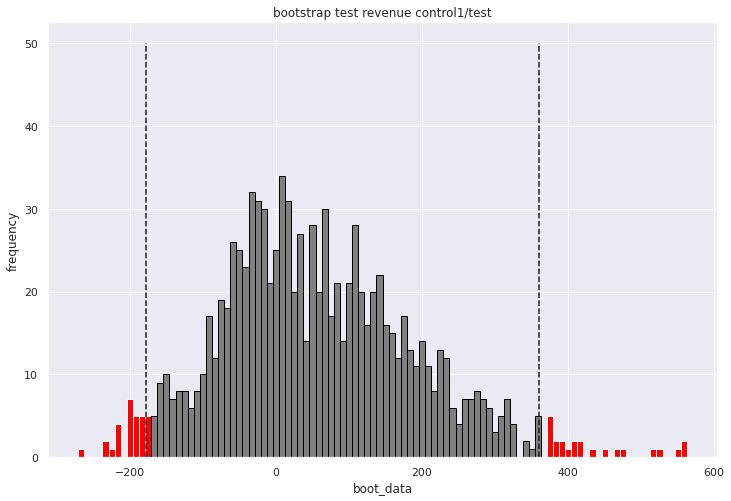

p-value = 0.6665408768327081


In [94]:
bs_rev1 = get_bootstrap(rev_con1, rev_test, title_='bootstrap test revenue control1/test')
print(f'p-value = {bs_rev1["p_value"]}')

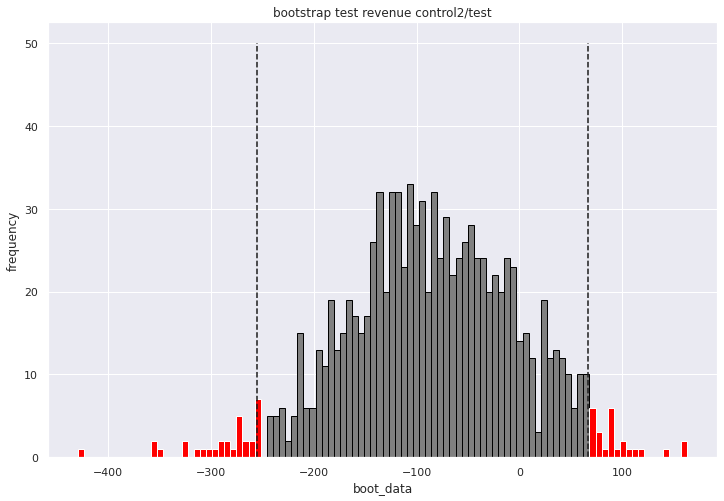

p-value = 0.3097979722147022


In [95]:
bs_rev2 = get_bootstrap(rev_con2, rev_test, title_='bootstrap test revenue control2/test')
print(f'p-value = {bs_rev2["p_value"]}')

в обоих тестах статистически значимых различий между группами не обнаружено

посмотрим, как повлиял эксперимент на ARPU в разных группах пользователей по признакам gender, country, attraction и age

#### gender

<b>ARPU</b> по группам в разрезе <b>male/female</b>

In [96]:
df_users_sum.groupby(['group', 'gender']) \
        .agg({'total_revenue': 'mean'}) \
        .round(2) \
        .reset_index() \
        .pivot(index='gender', columns='group', values='total_revenue')

group,control1,control2,test
gender,,,
female,249.50,209.53,134.05
male,609.87,461.93,553.76


проведем тесты

In [97]:
# вспомогательная функция для проведения t-test пакетом

def ttest_forlist(field, list_): # field - имя колонки, list_ - список значений 
    res = []
    for el in list_:
        test = df_users_sum.query(f'{field} == @el & group == "test"')['total_revenue']
        con1 = df_users_sum.query(f'{field} == @el & group == "control1"')['total_revenue']
        con2 = df_users_sum.query(f'{field} == @el & group == "control2"')['total_revenue']
        ttest1 = round(pg.ttest(con1, test)['p-val'][0], 3)
        ttest2 = round(pg.ttest(con2, test)['p-val'][0], 3)
        res.append([el, ttest1, ttest2])
    return pd.DataFrame(res, columns=[f'{field}', 'control1/test', 'control2/test'])

# вспомогательная функция для проведения bootstrap пакетом

def bootstrap_forlist(field, list_): # field - имя колонки, list_ - список значений 
    res = []
    for el in list_:
        test = df_users_sum.query(f'{field} == @el & group == "test"')['total_revenue']
        con1 = df_users_sum.query(f'{field} == @el & group == "control1"')['total_revenue']
        con2 = df_users_sum.query(f'{field} == @el & group == "control2"')['total_revenue']

        bs1 = round(get_bootstrap(con1, test, title_=f'bootstrap test for {field} : {el} control1/test')['p_value'], 3)
        print(f'p-value = {bs1}')
        bs2 = round(get_bootstrap(con2, test, title_=f'bootstrap test for {field} : {el} control2/test')['p_value'], 3)
        print(f'p-value = {bs2}')
        res.append([el, bs1, bs2])
    return pd.DataFrame(res, columns=[f'{field}', 'control1/test', 'control2/test'])

In [98]:
ttest_forlist('gender', ['male', 'female'])

,gender,control1/test,control2/test
0,male,0.698,0.271
1,female,0.463,0.561


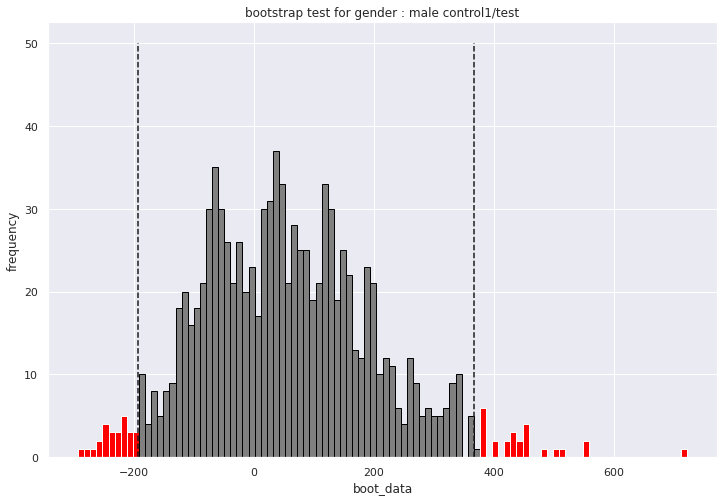

p-value = 0.69


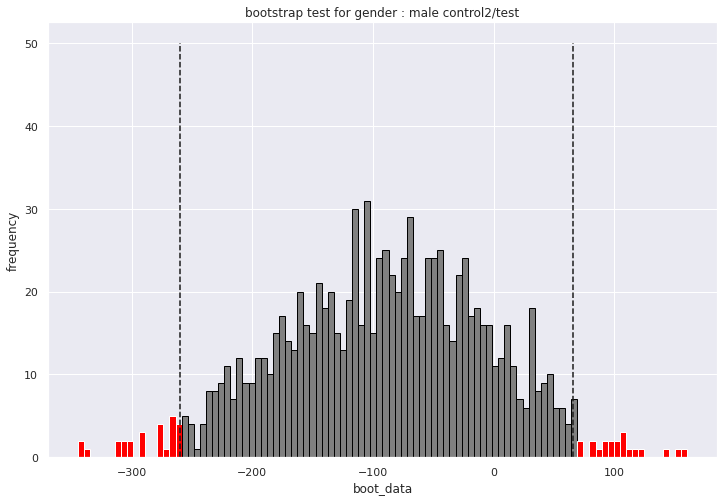

p-value = 0.293


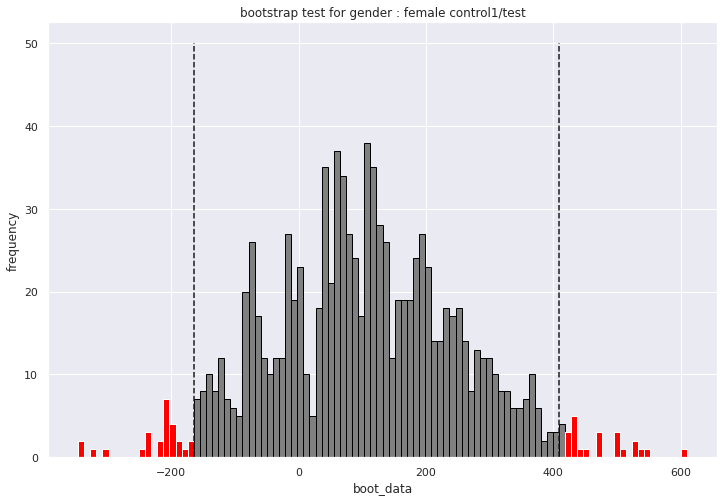

p-value = 0.482


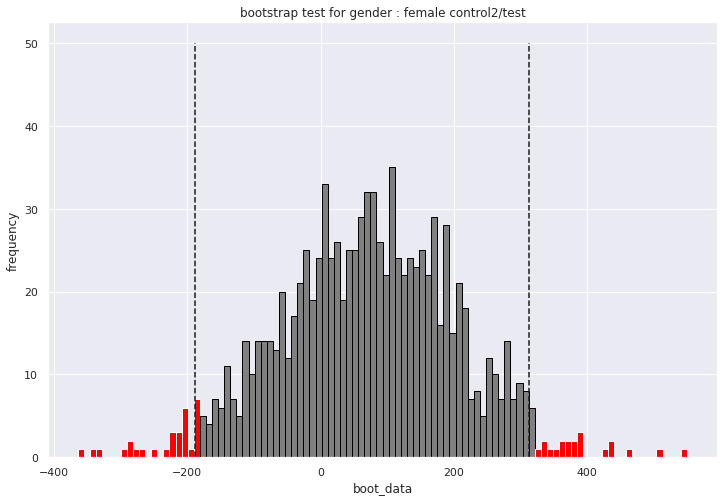

p-value = 0.588


,gender,control1/test,control2/test
0,male,0.690,0.293
1,female,0.482,0.588


In [99]:
bootstrap_forlist('gender', ['male', 'female'])

статистически значимых различий по признаку gender не обнаружено


#### country


возьмем ТОП10 стран по количеству пользователей

In [100]:
cross_by_country.head(10)

group,control1,control2,test
country,,,
United States of America,1471.0,1486.0,1450.0
Argentina,389.0,397.0,396.0
France,370.0,376.0,359.0
Italy,338.0,293.0,323.0
Spain,342.0,310.0,301.0
Chile,287.0,286.0,272.0
United Arab Emirates,207.0,211.0,226.0
Germany,188.0,202.0,209.0
United Kingdom (Great Britain),146.0,146.0,169.0


посмотрим на ARPU этих стран

In [101]:
country_list = list(cross_by_country.head(10).reset_index()['country'])

df_users_sum.query('country in @country_list') \
        .groupby(['group', 'country']) \
        .agg({'total_revenue': 'mean'}) \
        .round(2) \
        .reset_index() \
        .pivot(index='country', columns='group', values='total_revenue') \
        .sort_values('test', ascending=False) \
        .head(20)

group,control1,control2,test
country,,,
Spain,289.65,625.09,948.27
United Arab Emirates,364.94,555.18,945.95
France,498.25,396.47,706.45
United States of America,485.17,393.14,497.82
Argentina,371.95,304.83,474.80
Canada,686.96,227.89,463.26
Germany,127.65,353.51,459.79
United Kingdom (Great Britain),1362.77,660.77,457.85
Italy,1874.85,406.11,351.16


применим t-test

In [102]:
ttest_forlist('country', country_list)

,country,control1/test,control2/test
0,United States of America,0.921,0.346
1,Argentina,0.711,0.540
2,France,0.412,0.206
3,Italy,0.295,0.775
4,Spain,0.160,0.548
5,Chile,0.663,0.535
6,United Arab Emirates,0.323,0.571
7,Germany,0.157,0.712
8,United Kingdom (Great Britain),0.162,0.514
9,Canada,0.536,0.351


bootstrap

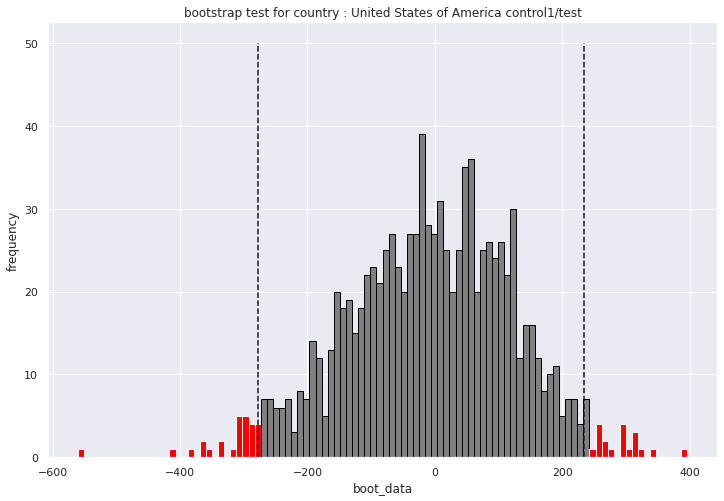

p-value = 0.95


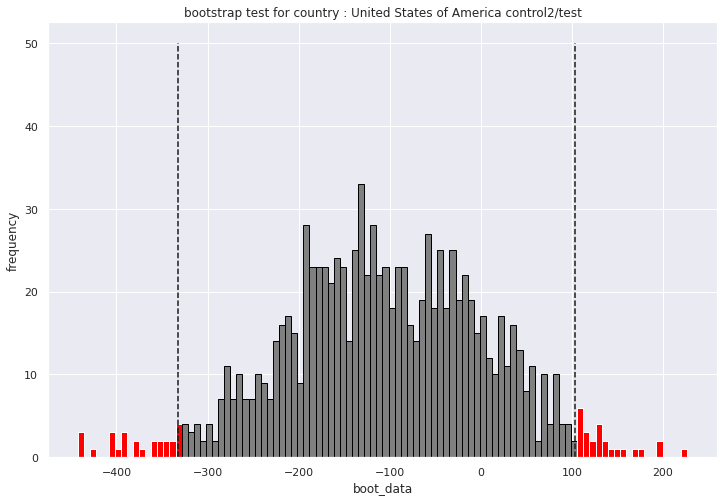

p-value = 0.339


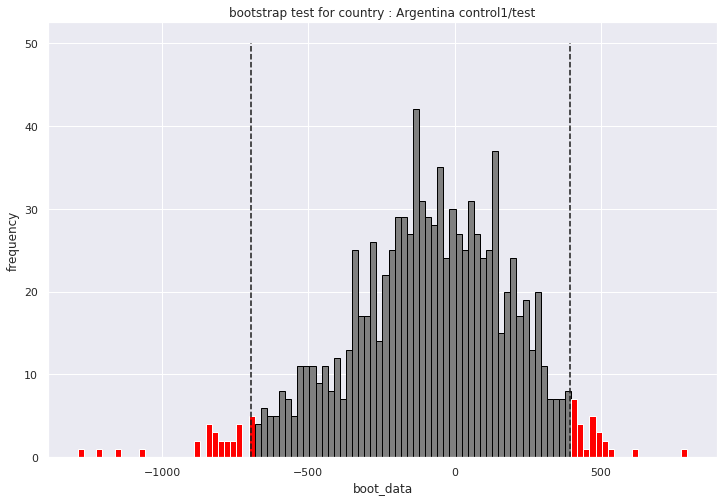

p-value = 0.747


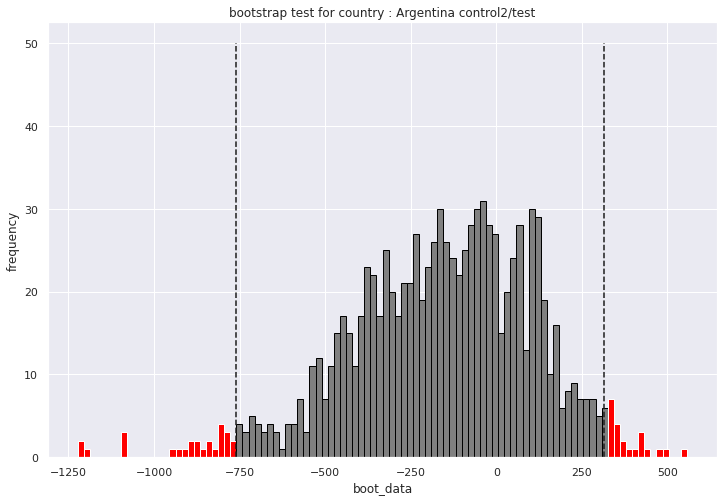

p-value = 0.556


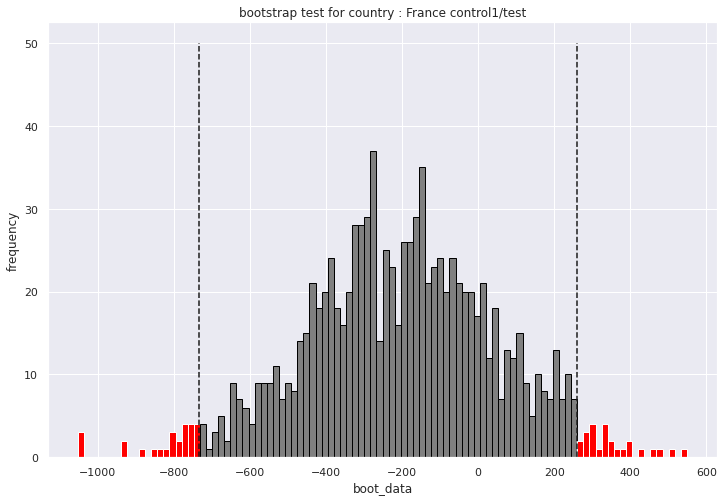

p-value = 0.414


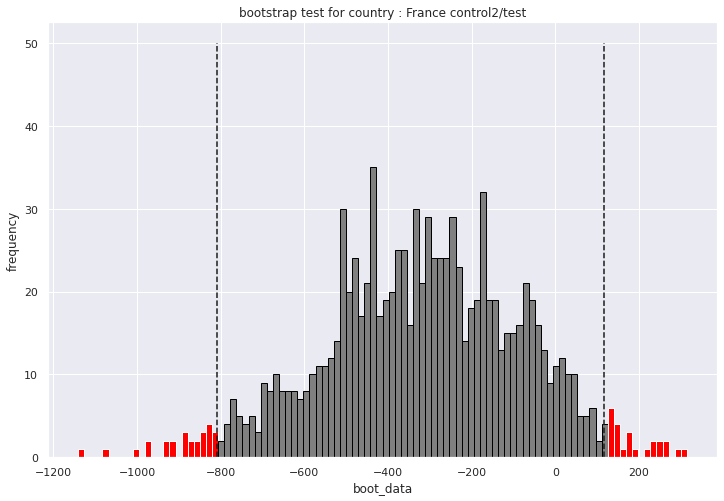

p-value = 0.176


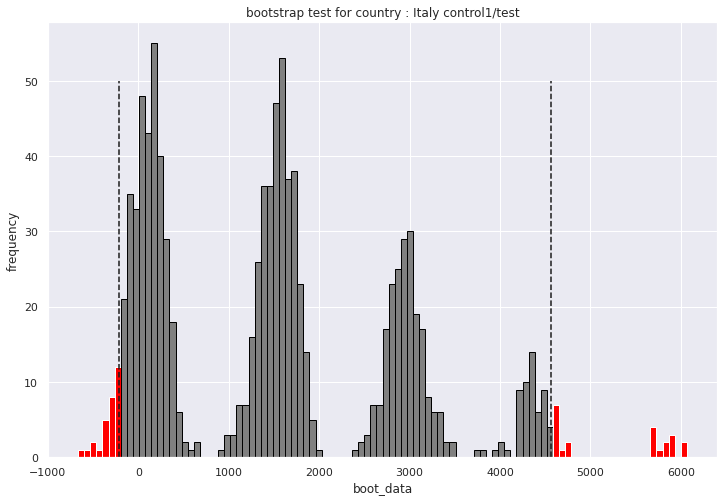

p-value = 0.274


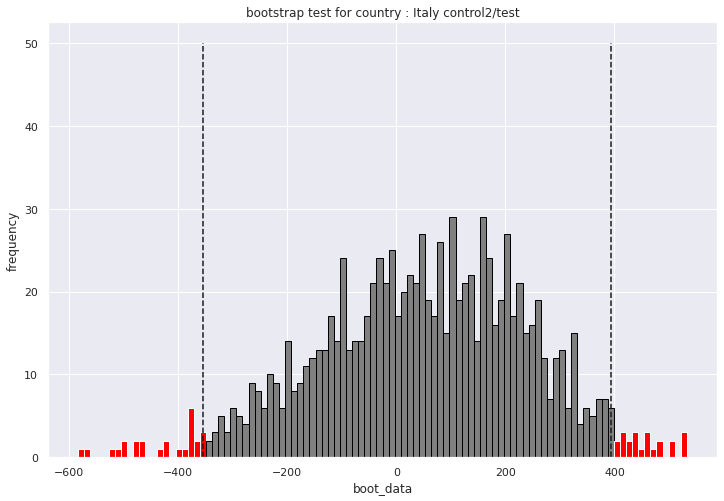

p-value = 0.799


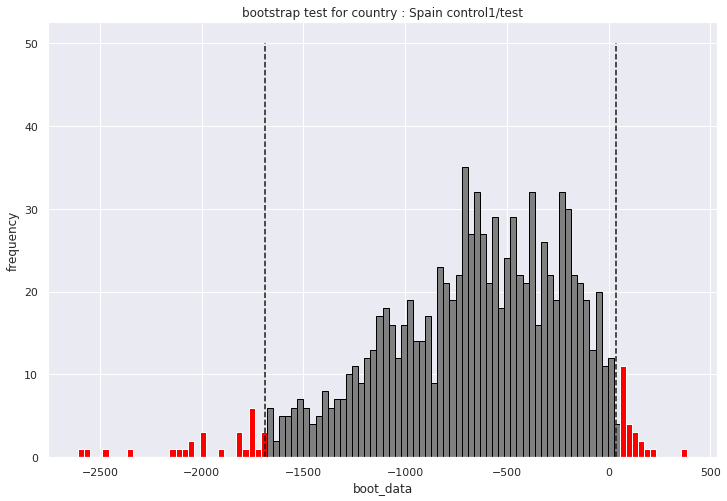

p-value = 0.154


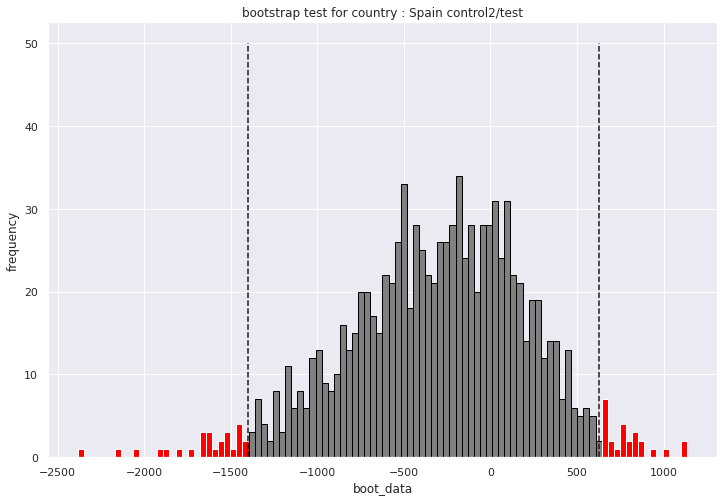

p-value = 0.555


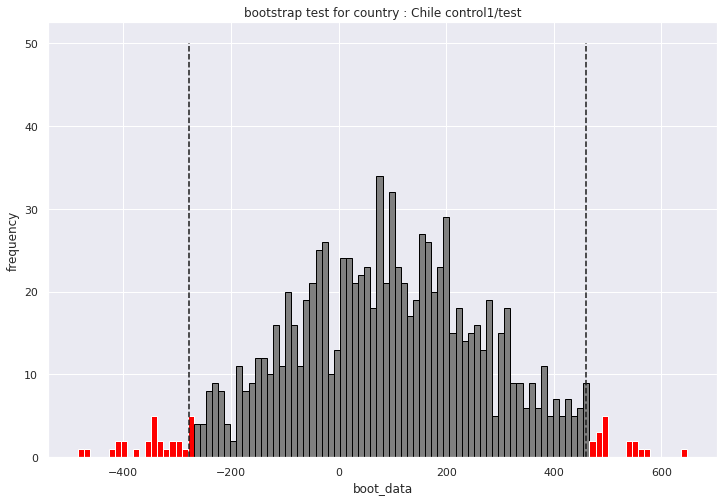

p-value = 0.634


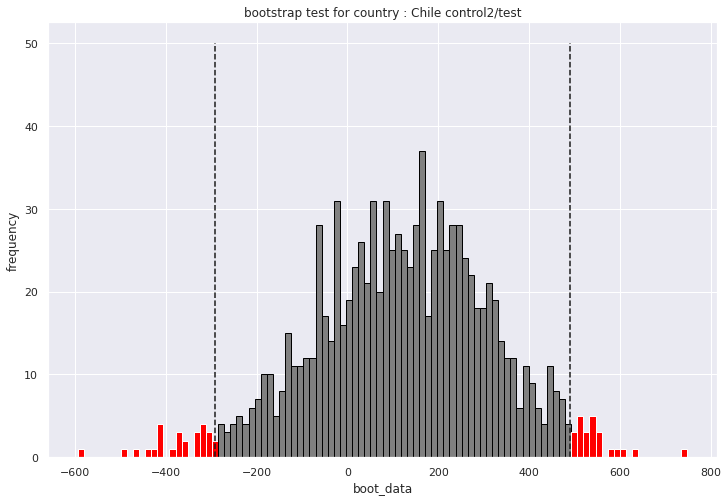

p-value = 0.541


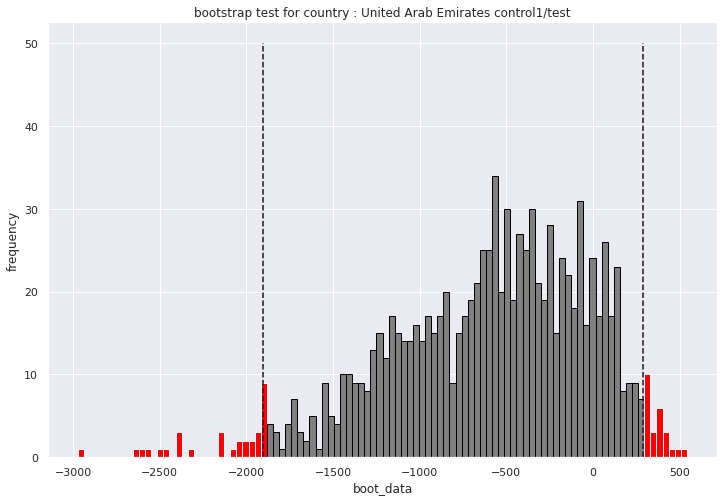

p-value = 0.3


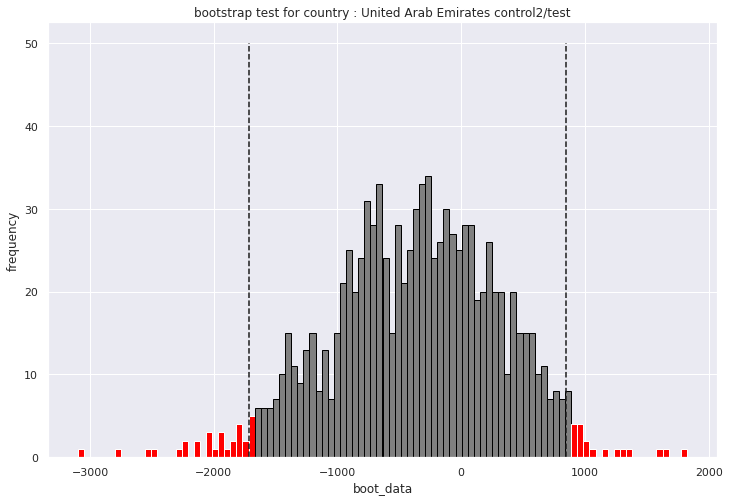

p-value = 0.586


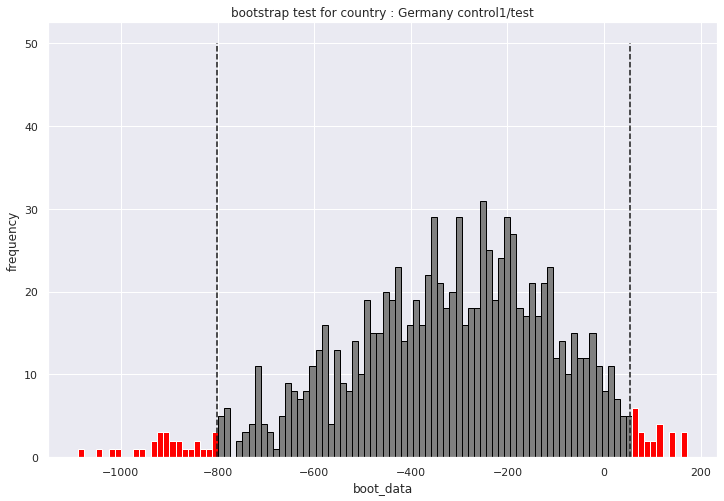

p-value = 0.148


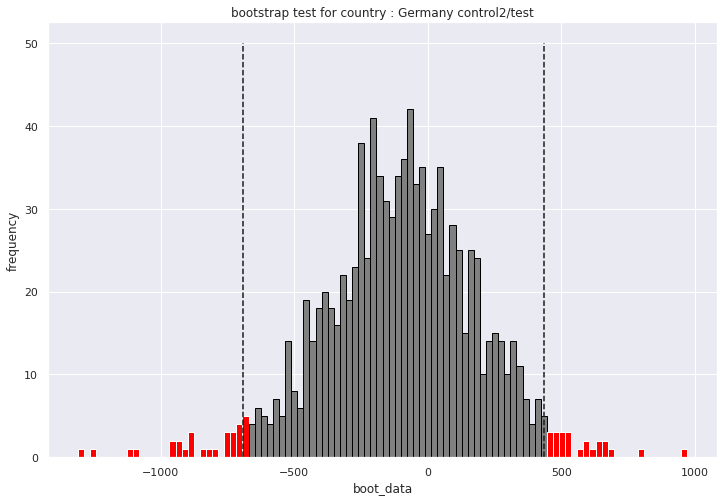

p-value = 0.72


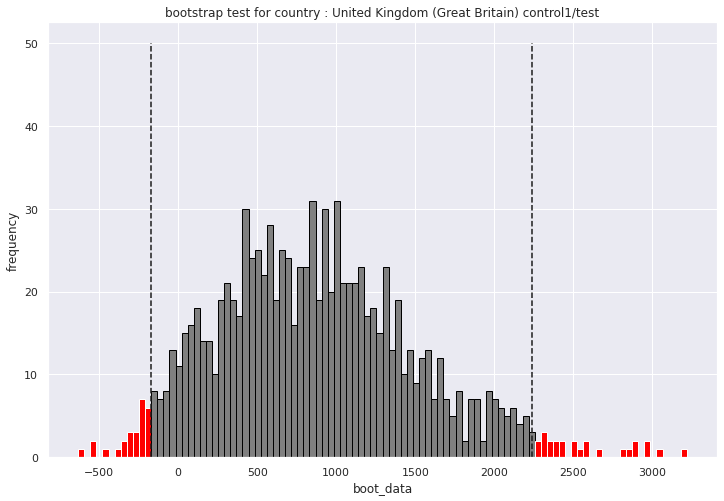

p-value = 0.167


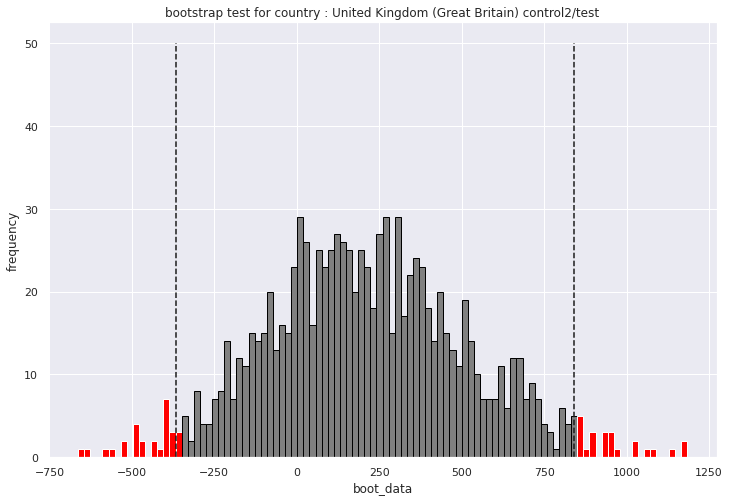

p-value = 0.484


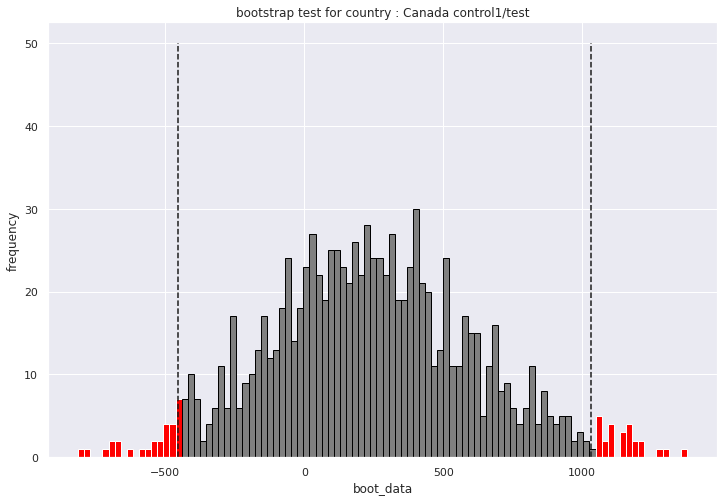

p-value = 0.521


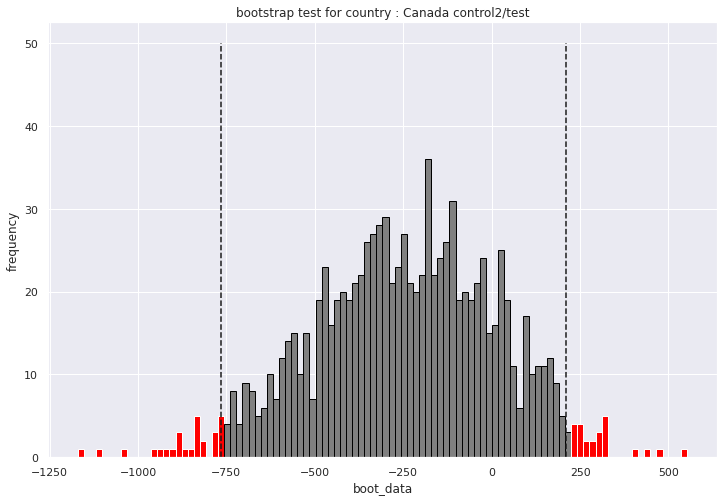

p-value = 0.341


,country,control1/test,control2/test
0,United States of America,0.950,0.339
1,Argentina,0.747,0.556
2,France,0.414,0.176
3,Italy,0.274,0.799
4,Spain,0.154,0.555
5,Chile,0.634,0.541
6,United Arab Emirates,0.300,0.586
7,Germany,0.148,0.720
8,United Kingdom (Great Britain),0.167,0.484
9,Canada,0.521,0.341


In [103]:
bootstrap_forlist('country', country_list)

статистически значимых различий по признаку <b>country</b> не обнаружено

#### <b>ARPU</b> по возрастным группам

In [104]:
df_users_sum.groupby(['group', 'age_group']) \
        .agg({'total_revenue': 'mean'}) \
        .round(2) \
        .reset_index() \
        .pivot(index='age_group', columns='group', values='total_revenue')

group,control1,control2,test
age_group,,,
age 0-24,942.61,377.31,468.52
age 25-29,633.97,448.74,447.31
age 30-37,381.99,456.90,608.80
age 38-xx,438.00,513.42,606.86


t-test

In [105]:
age_group_list = list(df_users_sum['age_group'].unique())

ttest_forlist('age_group', age_group_list)


,age_group,control1/test,control2/test
0,age 25-29,0.285,0.993
1,age 38-xx,0.335,0.592
2,age 30-37,0.081,0.319
3,age 0-24,0.319,0.499


bootstrap

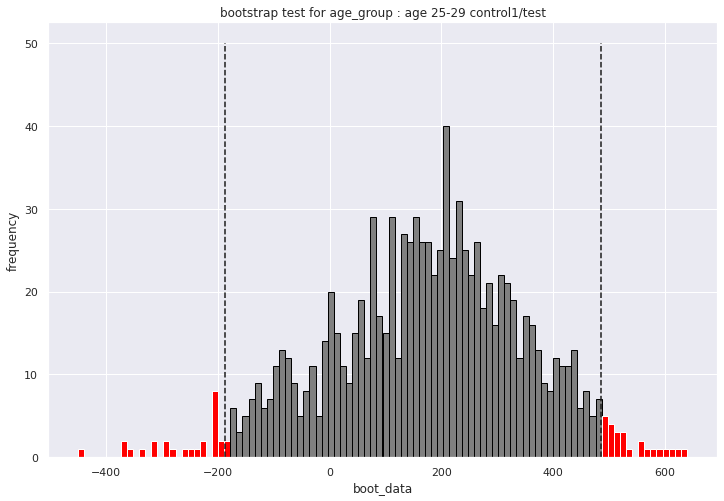

p-value = 0.323


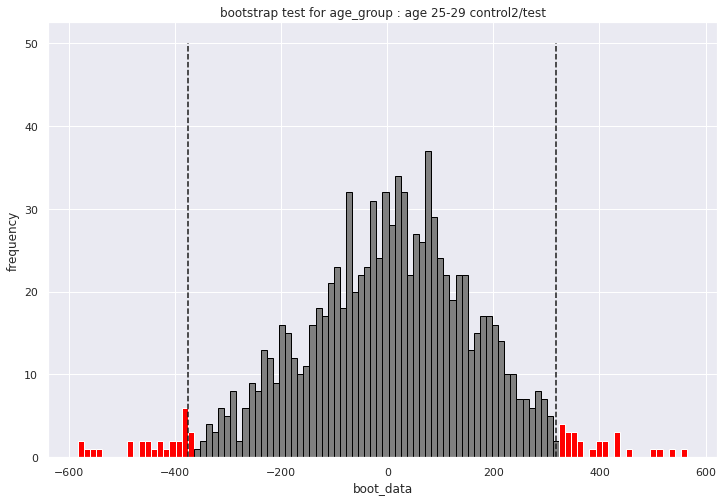

p-value = 0.991


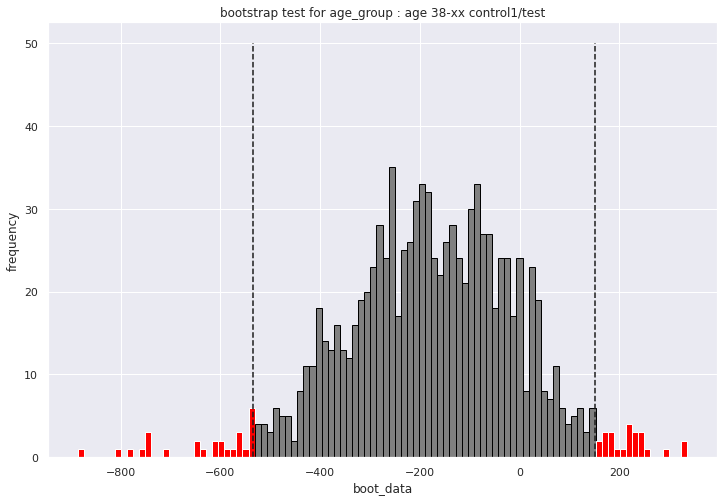

p-value = 0.304


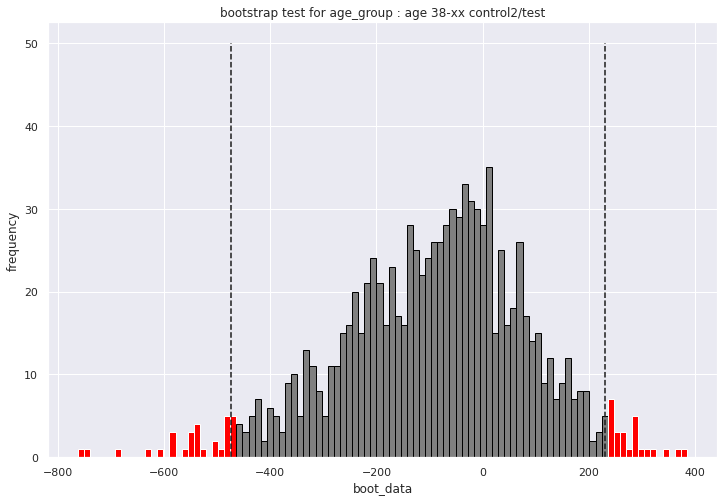

p-value = 0.597


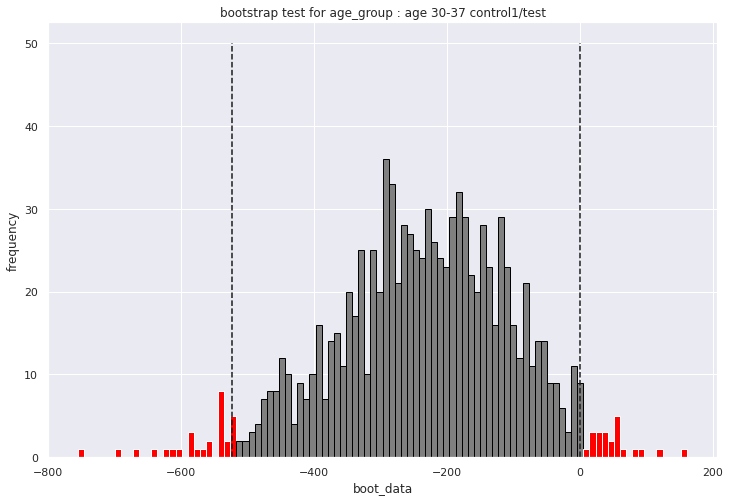

p-value = 0.078


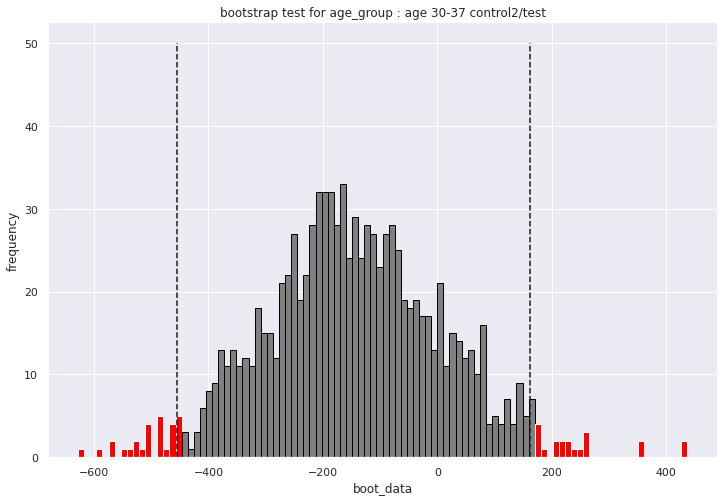

p-value = 0.346


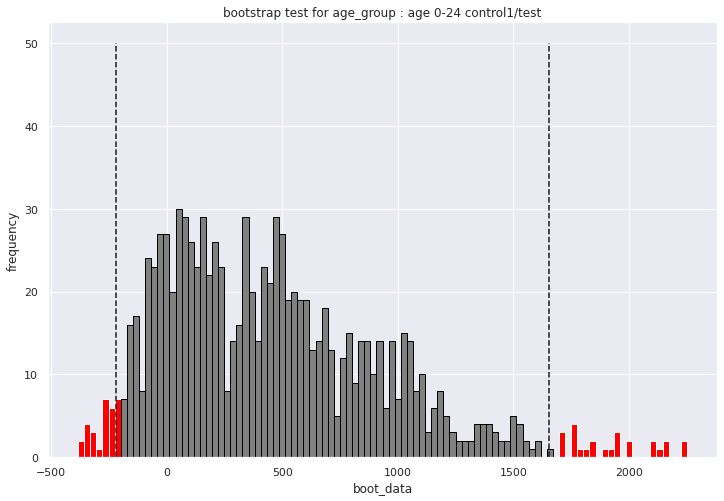

p-value = 0.34


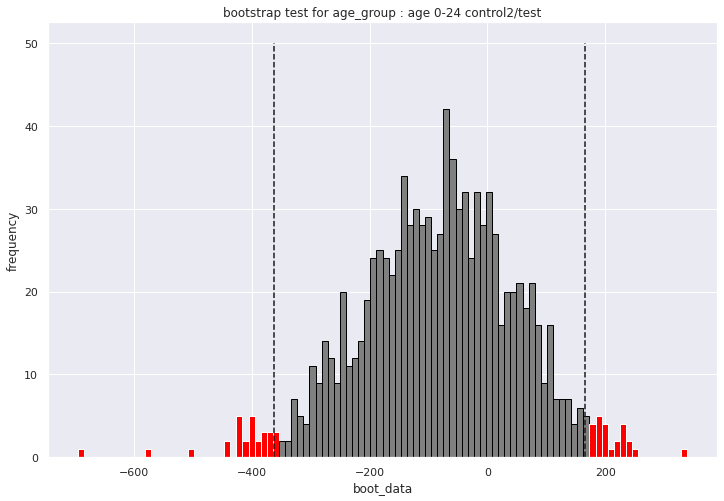

p-value = 0.534


,age_group,control1/test,control2/test
0,age 25-29,0.323,0.991
1,age 38-xx,0.304,0.597
2,age 30-37,0.078,0.346
3,age 0-24,0.340,0.534


In [106]:
bootstrap_forlist('age_group', age_group_list)

статистически значимых различий по признаку <b>age</b> не обнаружено

#### attraction

<b>ARPU</b> по признаку <b>attraction</b>

In [107]:
df_users_sum.groupby(['group', 'attraction_group']) \
        .agg({'total_revenue': 'mean'}) \
        .round(2) \
        .reset_index() \
        .pivot(index='attraction_group', columns='group', values='total_revenue')

group,control1,control2,test
attraction_group,,,
attraction 0-249,607.17,348.41,357.87
attraction 250-528,863.26,663.77,1049.63
attraction 529-1000,298.45,446.63,336.55


t-test

In [108]:
attraction_list = list(df_users_sum['attraction_group'].unique())

ttest_forlist('attraction_group', attraction_list)

,attraction_group,control1/test,control2/test
0,attraction 529-1000,0.707,0.333
1,attraction 0-249,0.296,0.903
2,attraction 250-528,0.450,0.116


bootstrap

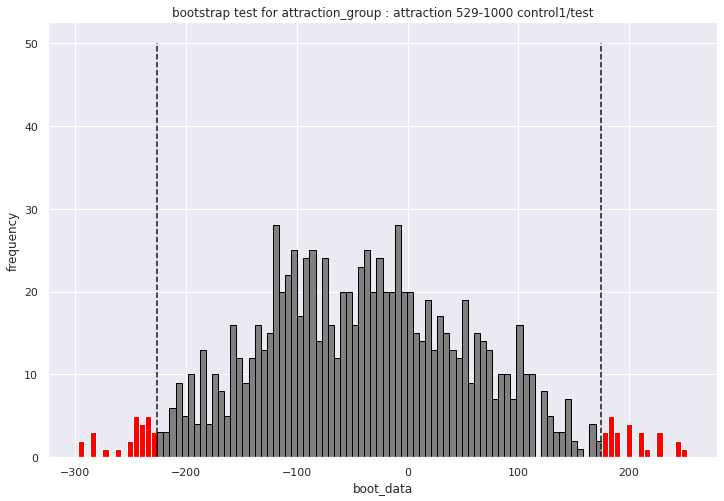

p-value = 0.698


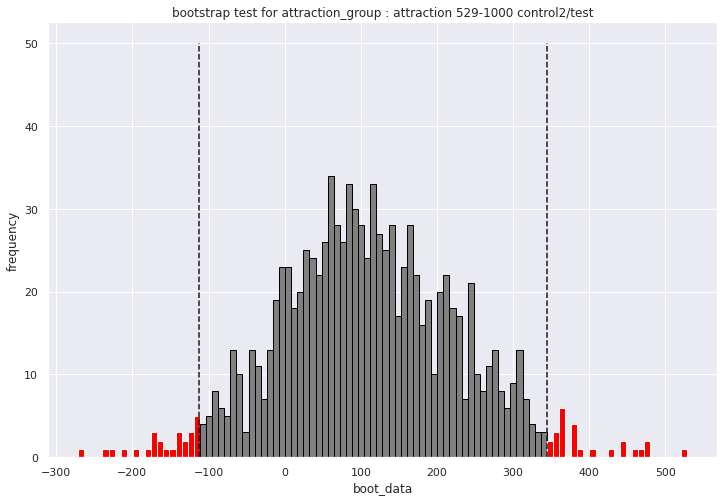

p-value = 0.348


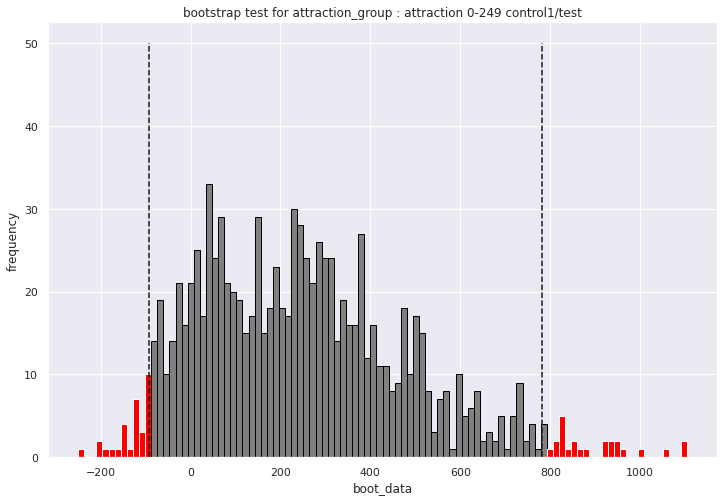

p-value = 0.286


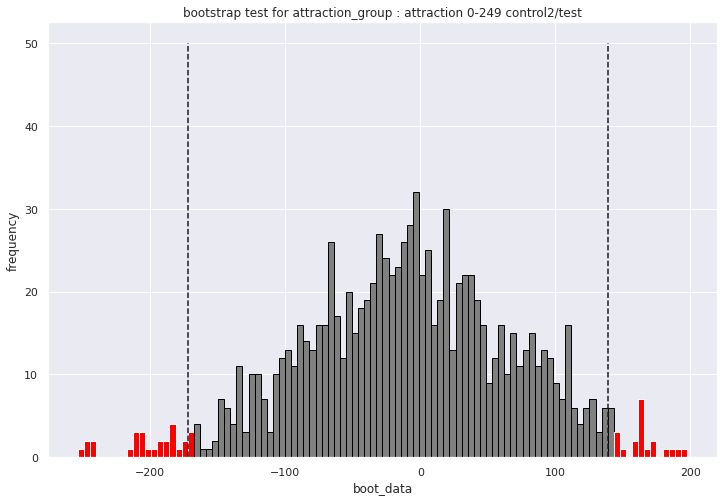

p-value = 0.909


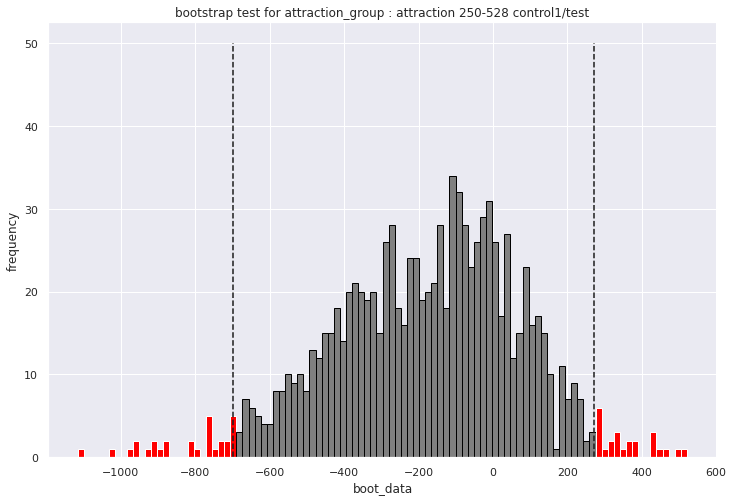

p-value = 0.469


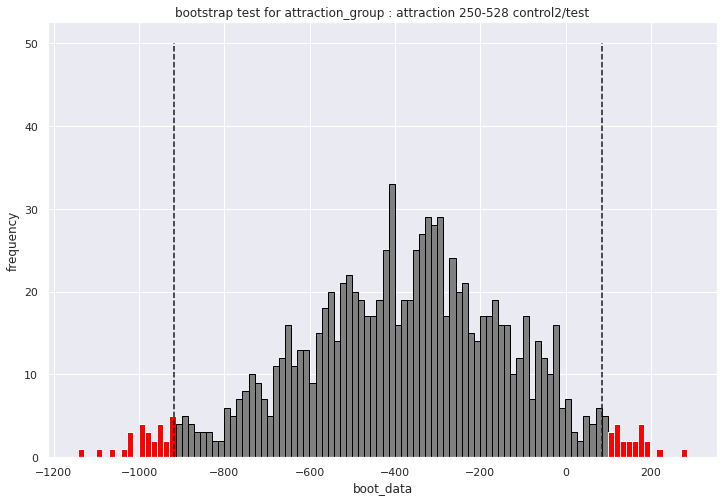

p-value = 0.126


,attraction_group,control1/test,control2/test
0,attraction 529-1000,0.698,0.348
1,attraction 0-249,0.286,0.909
2,attraction 250-528,0.469,0.126


In [109]:
bootstrap_forlist('attraction_group', attraction_list)

статистически значимых различий по признаку <b>attraction</b> не обнаружено

### <i>конверсия в подписку subscription CR

сводная таблица по количеству подписок

In [110]:
df_subs.groupby('group').agg({'trial_count': 'sum', 'premium_count': 'sum'})

,trial_count,premium_count
group,,
control1,67.0,106.0
control2,53.0,107.0
test,62.0,76.0


конверсия (посчитана раньше)

In [111]:
subs_cr

,"trialCR, %","premCR, %"
group,,
control1,1.54,2.44
control2,1.24,2.51
test,1.44,1.76


кросс-таблица

In [112]:
subs_cross = df_subs.groupby(['premium_count', 'group']) \
        .agg({'uid': 'count'}) \
        .rename(columns={'uid': 'count'}) \
        .reset_index() \
        .pivot(index='premium_count', columns='group', values='count').fillna(0)
display(subs_cross)

group,control1,control2,test
premium_count,,,
0.0,4241.0,4162.0,4241.0
1.0,92.0,98.0,61.0
2.0,7.0,3.0,3.0
3.0,0.0,1.0,3.0


тест хи-кварат control1/test

In [113]:
stats.chi2_contingency(subs_cross[['control1', 'test']])[1]

0.013080245096358203

тест хи-кварат control2/test

In [114]:
stats.chi2_contingency(subs_cross[['control2', 'test']])[1]

0.017515353828695835

как видим, в обоих случаях изменение(падение) конверсии статистически значимо

ничто не мешает применить bootstrap

In [115]:
subs_test = df_users_sum.query('group == "test"')['premium_count']
subs_con1 = df_users_sum.query('group == "control1"')['premium_count']
subs_con2 = df_users_sum.query('group == "control2"')['premium_count']

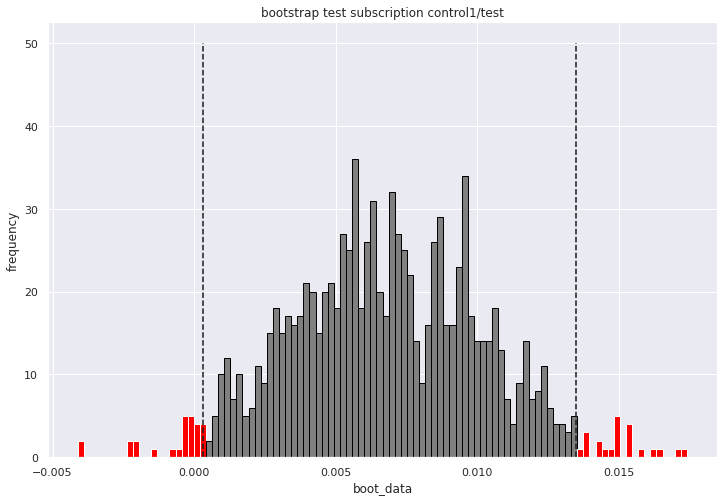

p-value = 0.047005547850966875


In [116]:
bs_subs1 = get_bootstrap(subs_con1, subs_test, title_='bootstrap test subscription control1/test')
print(f'p-value = {bs_subs1["p_value"]}')

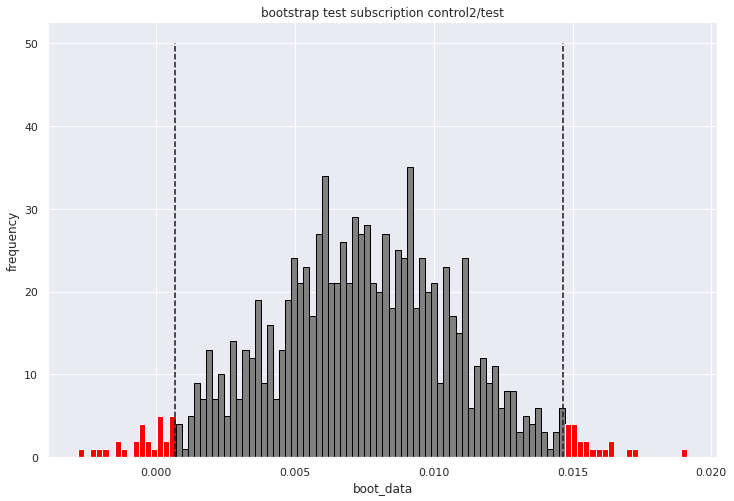

p-value = 0.03170824052213904


In [117]:
bs_subs2 = get_bootstrap(subs_con2, subs_test, title_='bootstrap test subscription control2/test')
print(f'p-value = {bs_subs2["p_value"]}')

bootstrap дает схожие результаты с хи-квадрат: статистически значимые изменения группы test по сравнению с обеими контрольными группами

посмотрим на эти изменения в разрезе country, gender, age и attraction

<b>country

In [118]:
df_users_sum.groupby(['group', 'country']) \
    .agg({'premium_count': 'sum'}) \
    .reset_index() \
    .pivot(index='country', columns='group', values='premium_count') \
    .sort_values('test', ascending=False) \
    .head(10)

group,control1,control2,test
country,,,
United States of America,29.0,33.0,20.0
Italy,15.0,4.0,8.0
United Arab Emirates,3.0,4.0,7.0
Chile,4.0,6.0,6.0
France,13.0,8.0,6.0
Spain,5.0,11.0,6.0
United Kingdom (Great Britain),5.0,11.0,5.0
Argentina,5.0,7.0,5.0
Canada,4.0,1.0,4.0


ничего по этим данным утверждать мы не можем, суммарное количество подписок достаточно небольшое а стран много<br>
самое большое падение в USA - в 1.5 раза, но это и понятно - это самая большая страна по количеству пользователей и выручке<br>
Италия, Франция -падение test/control1 в 2 раза, но это вывод не претендует на абсолютную истину, мало данных

<b>gender

In [119]:
df_users_sum.groupby(['group', 'gender']) \
    .agg({'premium_count': 'sum'}) \
    .reset_index() \
    .pivot(index='gender', columns='group', values='premium_count') \
    .sort_values('control1', ascending=False)

group,control1,control2,test
gender,,,
male,106.0,102.0,76.0
female,0.0,5.0,0.0


все изменения у мужчин, женщины как не покупали подписку, так и не покупают 

<b>age

In [120]:
df_users_sum.groupby(['group', 'age_group']) \
    .agg({'premium_count': 'sum'}) \
    .reset_index() \
    .pivot(index='age_group', columns='group', values='premium_count') \
    .sort_values('control1', ascending=False)

group,control1,control2,test
age_group,,,
age 0-24,32.0,32.0,20.0
age 25-29,31.0,30.0,13.0
age 38-xx,22.0,23.0,19.0
age 30-37,21.0,22.0,24.0


здесь можно с высокой долей уверенности предположить, что сильнее всего эксперимент повлиял на пользователей в возрасте до 30 лет<br>
суммарное падение в 2 раза<br>
тесты проводить не будем, малое количество измерений

<b>attraction

In [121]:
df_users_sum.groupby(['group', 'attraction_group']) \
    .agg({'premium_count': 'sum'}) \
    .reset_index() \
    .pivot(index='attraction_group', columns='group', values='premium_count') \
    .sort_values('control1', ascending=False)

group,control1,control2,test
attraction_group,,,
attraction 250-528,44.0,41.0,31.0
attraction 0-249,38.0,39.0,27.0
attraction 529-1000,24.0,27.0,18.0


падение одинаково коснулось всех пользователей, независимо от привлекательности

### <i>отток подписки</i>

In [122]:
df_churn = df_users_sum[['uid', 'group', 'was_premium', 'is_premium']]
df_churn['churn'] = (df_churn['was_premium'] - df_churn['is_premium'])*df_churn['was_premium']
df_churn.groupby('group').agg({'churn': 'sum'})

,churn
group,
control1,244
control2,220
test,251


In [123]:
df_churn.groupby('group').agg({'churn': 'mean'}).round(3).rename(columns={'churn': 'churn_rate'})

,churn_rate
group,
control1,0.056
control2,0.052
test,0.058


отток практически не изменился, из чего можно сделать вывод, что конверсия в подписку упала именно из-за новых пользователей, <br>
которые стали реже её покупать, а не из-за ухода старых

### <i>конверсия пользователей в оплату

количество пользователей заплативших хоть раз за любой продукт/услугу в сервисе

In [124]:
df_pays = df_users_sum[['uid', 'group', 'total_revenue']]
df_pays['is_pay'] = df_pays['total_revenue'].apply(lambda x: 1 if x > 0 else 0)
df_pays.groupby('group').agg({'is_pay': 'sum'})

,is_pay
group,
control1,192
control2,187
test,146


конверсия в оплату

In [125]:
df_pays.groupby('group').agg({'is_pay': 'mean'})

,is_pay
group,
control1,0.044240
control2,0.043856
test,0.033890


конверсия в группе test упала, проверим это тестами

кросс-таблица

In [126]:
pays_cross = df_pays.groupby(['is_pay', 'group']) \
        .agg({'uid': 'count'}) \
        .rename(columns={'uid': 'count'}) \
        .reset_index() \
        .pivot(index='is_pay', columns='group', values='count').fillna(0)
display(pays_cross)

group,control1,control2,test
is_pay,,,
0,4148,4077,4162
1,192,187,146


In [127]:
stats.chi2_contingency(pays_cross[['control1', 'test']])[1]

0.015200034667087775

In [128]:
stats.chi2_contingency(pays_cross[['control2', 'test']])[1]

0.019731316532729696

как видим, в обоих случаях изменение(падение) конверсии в оплату статистически значимо

bootstrap

In [129]:
pay_test = df_pays.query('group == "test"')['is_pay']
pay_con1 = df_pays.query('group == "control1"')['is_pay']
pay_con2 = df_pays.query('group == "control2"')['is_pay']

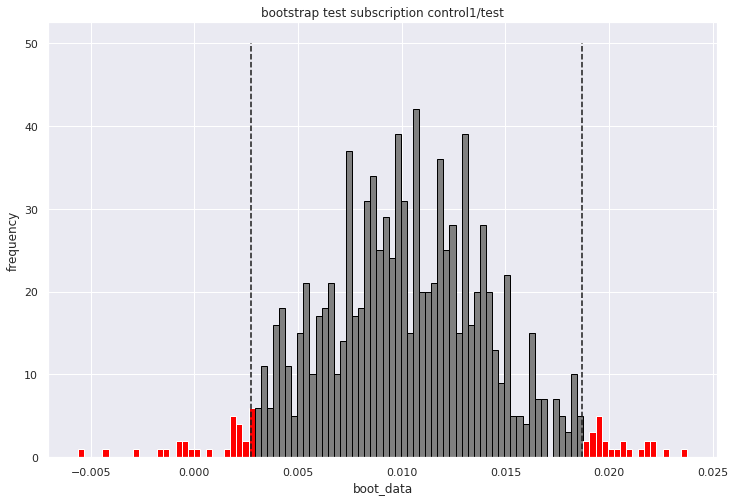

0.014375432280404127


In [130]:
bs_pay1 = get_bootstrap(pay_con1, pay_test, title_='bootstrap test subscription control1/test')
print(bs_pay1['p_value'])

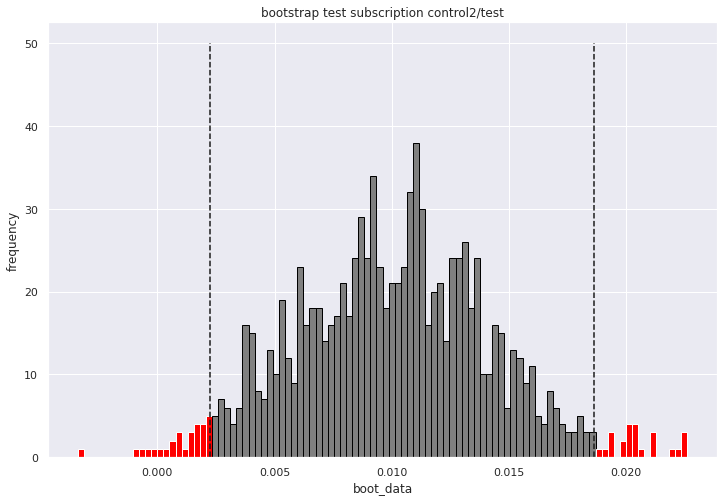

0.015915739397251005


In [131]:
bs_pay2 = get_bootstrap(pay_con2, pay_test, title_='bootstrap test subscription control2/test')
print(bs_pay2['p_value'])

---

# <b>Выводы

Обнаружить какие-либо статистически значимые изменения ARPU от проведения эксперимента не удалось,<br>
как в целом по группам, так и в разрезе признаков gender, age, attraction и country.<br>
<br>
На посещаемости приложения эксперимент также не отразился.<br>
<br>
А вот на конверсию в premium подписку и в оплату в целом эксперимент повлиял негативно,<br>
задетектировано статистически значимое падение конверсии в premium подписку и в оплату в целом: <br>
<ul>
<li>падение конверсии в premium подписку в сравнении с группой control1 - 0.68 пп или 27%</li>
<li>падение конверсии в premium подписку в сравнении с группой control2 - 0.74 пп или 29%</li>
<li>падение конверсии в любую оплату в сравнении с группой control1 - 1.1 пп или 25%</li>
<li>падение конверсии в любую оплату в сравнении с группой control2 - 1.1 пп или 25%</li>
<li>падение конверсии в основном коснулось мужчин в возрасте до 30 лет</li>
<li>самое большое падение конверсии в США, Италии и Франции, нужно обратить на это внимание</li>
</ul>
<br>
Не рекомендуется внедрять изменения.